# pytorch 基础
# Keras
本课内容包括
1. 基本的pytorch入门，以及对应的Keras，但还是以pytorch为主
2. pytorch中向量、导数、偏导操作，参考之前线性代数以及微积分
3. 基于pytorch构建一个线性回归网络
4. 基于pytorch实现class1 对图片的分类以及优化

---

参考资料

1. [ws university pytorch introudction](https://courses.cs.washington.edu/courses/cse446/19au/section9.html)
2. [li hong yi](https://www.youtube.com/watch?v=kQeezFrNoOg)
3. [pytorch homepage](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)
4. python 深度学习

## 1.安装pytorch

与tensorflow相同，pytorch分为cpu版本与gpu版本，官网有相对于安装代码
[安装页面](https://pytorch.org/)




pytorch 中torch的作用类似numpy，包括创建数组，进行线性代数运算等，但torch还可以直接进行求导运算

numpy 与 torch之间也可以相互转化

例如numpy中创建数组与torch中创建tensor张量对比

```python 
np.array([12,3])
torch.tensor([12,3])
```

1. array与tensor相互转换


#### 张量

之前的深度学习模型中，基于numpy构建模型，但在pytorch与tensorflow等深度学习框架中，使用的是tensor（张量）概念。

张量是一种数据结构，可以认为是一种高维数组。结合线性代数，所对照的张量

* 标量——0阶张量
* 向量——1阶张量
* 矩阵——2阶张量
* 多维向量组——多阶张量

---
不同于tensorflow，pytorch中张量表达与计算与numpy基本相同

In [1]:
!pip install numpy

In [1]:
import numpy as np 
import torch 
if __name__ == '__main__':
    x_tensor=torch.tensor([2,3,2])
    print(type(x_tensor))
    print(x_tensor)
    y_array=x_tensor.numpy()#转换tensor到array
    print(type(y_array))
    print(y_array)

    x_arrray=np.array([[2,2,3],[2,2,2]])
    print(type(x_arrray))
    print(x_arrray.shape)
    y_tensor=torch.from_numpy(x_arrray)
    print(type(y_tensor))
    print(y_tensor.shape)

<class 'torch.Tensor'>
tensor([2, 3, 2])
<class 'numpy.ndarray'>
[2 3 2]
<class 'numpy.ndarray'>
(2, 3)
<class 'torch.Tensor'>
torch.Size([2, 3])


2. tensor 中的线性代数计算
tensor中的计算与numpy中基本一致，包括加减，内积,求norm等。

例如以下代码模拟了一个神经网络affine层中的输入值与权参相乘与偏参相加的计算

In [2]:
# 注意，torch在求norm时，要求数据必须为float数据，故在开始就必须制定向量的数据类型
import torch
x=torch.tensor([2,3,3],dtype=float)
w=torch.tensor([[2,2],[1,2],[3,2]],dtype=float)
b=torch.tensor([1,2],dtype=float)
z=x@w+b
print(z)
print(torch.norm(z))

tensor([17., 18.], dtype=torch.float64)
tensor(24.7588, dtype=torch.float64)


tensor中正态分布、随机值等的生成与numpy也一致

```python
torch.rand(维度1数，维度2数，维度3数)
```


In [3]:
import numpy as np 
x=torch.rand(2,2,2,2)
print('x是一个四阶张量',x.shape)
print('the shape of x',x.shape)
print(x)
x_a=np.random.rand(2,2,2,2,2)
print(x_a.shape)
print(x_a) 


x是一个四阶张量 torch.Size([2, 2, 2, 2])
the shape of x torch.Size([2, 2, 2, 2])
tensor([[[[0.6151, 0.8784],
          [0.7847, 0.5676]],

         [[0.4237, 0.1793],
          [0.4317, 0.1019]]],


        [[[0.6283, 0.8648],
          [0.0628, 0.8379]],

         [[0.3233, 0.9819],
          [0.8989, 0.3853]]]])


NameError: name 'np' is not defined

tensor 形状改变
* Tensor.view-改变形状
* Tensor.flatten-降维为1维

We can use the Tensor.view() function to reshape tensors similarly to numpy.reshape()

It can also automatically calculate the correct dimension if a -1 is passed in. This is useful if we are working with batches, but the batch size is unknown.
 
 

In [6]:
batch=1000
img_x=28
img_y=28
#生成一个（1000，28，29）形状的张量，模拟1000张28*28图像
x=torch.rand(batch,img_x,img_y)
print(x.shape)
#将x变更为(1000,784)形状的张量
x2=x.view(batch,img_x*img_y)
print(x2.shape)
#当不确定某维度的大小（batch大小），可以设为-1，torch将自动赋值
x3=x.view(batch,-1)
print(x3.shape)
x3=x.view(-1,784)
print(x3.shape)
#将张量降维为1维
x_fallten=torch.flatten(x)
print(x_fallten.shape)


torch.Size([1000, 28, 28])
torch.Size([1000, 784])
torch.Size([1000, 784])
torch.Size([1000, 784])
torch.Size([784000])


## Computation graphs 计算图

参考
* [computation graph](https://colah.github.io/posts/2015-08-Backprop/)


What's special about PyTorch's tensor object is that it implicitly creates a computation graph in the background. A computation graph is a a way of writing a mathematical expression as a graph. There is an algorithm to compute the gradients of all the variables of a computation graph in time on the same order it is to compute the function itself.

---

pytorch可以自动实现计算图，Backpropagation反向传播

<img src="figs\tree-def.png" height="50%" width="50%">

例如上图对应计算 $e=(a+b) \times (1+b)$，求$a=1,b=2$时的反向传播

为此，在对tensor复制时候，必须设置**requires_grad=True**从而pytroch将会保留计算图
>we set requires_grad=True to let PyTorch know to keep the graph


In [7]:
a=torch.tensor(1.0,requires_grad=True)
b=torch.tensor(2.0,requires_grad=True)
c=a+b
d=1+b
e=c*d
print(c)
print(d)
print(e)


tensor(3., grad_fn=<AddBackward0>)
tensor(3., grad_fn=<AddBackward0>)
tensor(9., grad_fn=<MulBackward0>)


## PyTorch as an auto grad framework
Now that we have seen that PyTorch keeps the graph around for us, let's use it to compute some gradients for us.

Consider the function  $f(x)=(x−2)^2$
 .

Q: Compute  $\frac{df(x)}{dx}$
  and then compute  $f′(1)$
 .

We make a backward() call on the leaf variable (y) in the computation, computing all the gradients of y at once.

---
实际就是pytorch实现了链式求导：
1. pytorch 中，张量具有require_grad属性，该属性为True则将跟踪对此张量的所有计算。
2. 完成正向传播计算后，可以对计算结果调用backward（）方法，将自动计算所有梯度，并保存至grad属性中
3. 张量的grad_fn属性将指向运算生成该张量的方法。
通过pytorch中backward可以求得导函数结果


In [6]:
import torch
def f(x):
    return (x-2)**2
x=torch.tensor(1.0,requires_grad=True)
y=f(x)
print("正向传播forward:",y)
y.backward()
print("反向传播结果",x.grad)
print('对f(x)求导',y.grad_fn)
x2=x-x.grad
print(x2)
'''
在PyTorch中，y.grad_fn代表的是梯度函数，也就是用于计算y相对于其输入变量的梯度的函数。这是因为PyTorch使用动态图和自动微分机制来计算梯度，
每个张量（Tensor）都有一个.grad_fn属性，该属性引用了创建该张量的Function对象（如果该张量是用户手动创建的，则此属性为None）。

在你的代码示例中，y=f(x)通过计算(x-2)**2得到，这个操作背后是一个Pow操作（幂运算），因此y的.grad_fn属性会指向这个Pow操作的梯度函数。
当你调用y.backward()时，PyTorch会自动计算y关于x的梯度，并将计算结果存储在x.grad中。

简而言之，y.grad_fn是一个指向生成y的操作的梯度函数的引用，它是自动微分系统的一部分，用于在反向传播过程中计算梯度。'''

正向传播forward: tensor(1., grad_fn=<PowBackward0>)
反向传播结果 tensor(-2.)
对f(x)求导 <PowBackward0 object at 0x00000218BA5628F0>
tensor(3., grad_fn=<SubBackward0>)


'\n在PyTorch中，y.grad_fn代表的是梯度函数，也就是用于计算y相对于其输入变量的梯度的函数。这是因为PyTorch使用动态图和自动微分机制来计算梯度，\n每个张量（Tensor）都有一个.grad_fn属性，该属性引用了创建该张量的Function对象（如果该张量是用户手动创建的，则此属性为None）。\n\n在你的代码示例中，y=f(x)通过计算(x-2)**2得到，这个操作背后是一个Pow操作（幂运算），因此y的.grad_fn属性会指向这个Pow操作的梯度函数。\n当你调用y.backward()时，PyTorch会自动计算y关于x的梯度，并将计算结果存储在x.grad中。\n\n简而言之，y.grad_fn是一个指向生成y的操作的梯度函数的引用，它是自动微分系统的一部分，用于在反向传播过程中计算梯度。'

可以设置一个嵌套函数，并求得不同层变量的导数
设
$$y=x^2 \rightarrow z=y+w \rightarrow e=z\times 3+5$$
其中$x=2,w=3$求位于链式求导叶子节点的$\frac{de}{dx},\frac{de}{dw}$

In [10]:
def y(x):
    return x**2
def z(y,w):
    return y+w
def e(z):
    return z*3

if __name__ == '__main__':
    x=torch.tensor(2.0,requires_grad=True)
    w=torch.tensor(3.0,requires_grad=True)
    ##forwad
    y=y(x)
    z=z(y,w)
    e=e(z)
    print("forward result:",e)
    #backward 
    e.backward()
    print("e函数求梯度方法：",e.grad_fn)
    print("y函数求梯度方法：",y.grad_fn)
    print("x的梯度",x.grad)
    print("w的梯度",w.grad)
    

forward result: tensor(21., grad_fn=<MulBackward0>)
e函数求梯度方法： <MulBackward0 object at 0x00000298310EF0A0>
y函数求梯度方法： <PowBackward0 object at 0x00000298310EF0A0>
x的梯度 tensor(12.)
w的梯度 tensor(3.)


It can also find gradients of functions.

Let  $w=[w_1,w_2]^T$
 
Consider  $(w)=2w_1w_2+w_2\cos(w_1)$
 
Q: Compute  $∇wg(w)$
  and verify $ ∇wg([π,1])=[2,π−1]^T$

---

进一步求得偏导数，并构成梯度向量

 

In [18]:
import numpy as np 
import torch
def g(w):
    return 2*w[0]*w[1]+w[1]*torch.cos(w[0])
if __name__ == "__main__":
     w=torch.tensor([np.pi,1],dtype=float,requires_grad=True)
     forward=g(w)
     print("the forward result:", forward)
     backward_method=g(w).grad_fn
     print("the backward method of w", backward_method)
     g(w).backward()# backward方法需要显式调用
     w_grad=w.grad
     print("the grad of w",w_grad)
     

the forward result: tensor(5.2832, dtype=torch.float64, grad_fn=<AddBackward0>)
the backward method of w <AddBackward0 object at 0x00000218BA5B81C0>
the grad of w tensor([2.0000, 5.2832], dtype=torch.float64)


In [11]:
def g(w):
    return 2*w[0]*w[1]+w[1]*torch.cos(w[0])
if __name__ == '__main__':
    w=torch.tensor([torch.pi,1],dtype=float,requires_grad=True)
    print("forwad")
    g=g(w)
    print(g)
    print("backward")
    g.backward()
    print(w.grad)

forwad
tensor(5.2832, dtype=torch.float64, grad_fn=<AddBackward0>)
backward
tensor([2.0000, 5.2832], dtype=torch.float64)


基于以上torch对backward，梯度计算方式，可以结合实现梯度下降法；

---
Using the gradients
Now that we have gradients, we can use our favorite optimization algorithm: gradient descent!

Let  $f$
  the same function we defined above.

Q: What is the value of $ x$
  that minimizes $ f$?

  ---

  注意在此

In [6]:
def f(x):
    return (x-2)**2

if __name__=='__main__':
    iter=100
    learning_rate=0.8
    x=torch.tensor([100.0],requires_grad=True)
    
    for i in range(iter):
        y=f(x)
        y.backward()
        #计算时，必须使用x.data
        x.data=x.data-(x.grad)*learning_rate
        print(x.data)
        
        x.grad.zero_() 


tensor([-56.8000])
tensor([37.2800])
tensor([-19.1680])
tensor([14.7008])
tensor([-5.6205])
tensor([6.5723])
tensor([-0.7434])
tensor([3.6460])
tensor([1.0124])
tensor([2.5926])
tensor([1.6445])
tensor([2.2133])
tensor([1.8720])
tensor([2.0768])
tensor([1.9539])
tensor([2.0276])
tensor([1.9834])
tensor([2.0100])
tensor([1.9940])
tensor([2.0036])
tensor([1.9979])
tensor([2.0013])
tensor([1.9992])
tensor([2.0005])
tensor([1.9997])
tensor([2.0002])
tensor([1.9999])
tensor([2.0001])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.0000])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2.])
tensor([2

基于Pytorch建立线性方程

1. 构建基本的线性方程
2. 描述方程各个部分

---
Linear Module 
 
The bread and butter of modules is the Linear module which does a linear transformation with a bias. It takes the input and output dimensions as parameters, and creates the weights in the object.

Unlike how we initialized our  w manually, the Linear module automatically initializes the weights randomly. 

For minimizing non convex（非凸） loss functions (e.g. training neural networks), initialization is important and can affect results. 

If training isn't working as well as expected, one thing to try is manually initializing the weights to something different from the default. PyTorch implements some common initializations in torch.nn.init.

---

pytorch 在linear层将会自动初始化权参、偏参的初始值，通过torch.nn.init 实现。

---

pytorch linear层 就是affine，实现了一个被称为仿射变换（affine transformation）的操作。
$$y=xA^{T} +b$$
这里，x是输入，A是层的权重矩阵，b是偏置项，y是输出。这个操作包括了两个主要部分：一个是输入x和权重A的矩阵乘法，另一个是加上偏置b。这种操作确实是一个仿射变换，因为它既有线性映射也有平移。

### torch.optim 优化函数
PyTorch implements a number of gradient-based optimization methods in torch.optim, including Gradient Descent.

* At the minimum, it takes in the model parameters and a learning rate.

* Optimizers do not compute the gradients for you, so you must call backward() yourself.

* You also must call the optim.zero_grad() function before calling backward() since by default

 * PyTorch does and inplace add to the .grad member variable rather than overwriting it.

* This does both the detach_() and zero_() calls on all tensor's grad variables.

初始的tensor，x_t的shape： torch.Size([20, 1])
初始的tensor,y_t的shape： torch.Size([20, 1])
numpy转换后的数据x_n,shape (1, 20) 变成了一个元组
numpy转换后的数据y_n,shape (1, 20) 变成了一个元组
通过一次forwad后得到y predict，其形状是 torch.Size([20, 1])
模型中参数： <generator object Module.parameters at 0x000001D70C950EB0>
初始权参值: Parameter containing:
tensor([[0.0827]], requires_grad=True)
初始偏参值: Parameter containing:
tensor([-0.1795], requires_grad=True)
第 0 次epoch
第 1 次梯度下降后
模型中权参梯度： tensor([[-368.6832]])
模型中偏参梯度 tensor([-107.2979])
第 2 次梯度下降后
模型中权参梯度： tensor([[-360.7643]])
模型中偏参梯度 tensor([-105.0278])
第 3 次梯度下降后
模型中权参梯度： tensor([[-353.0154]])
模型中偏参梯度 tensor([-102.8065])
第 4 次梯度下降后
模型中权参梯度： tensor([[-345.4327]])
模型中偏参梯度 tensor([-100.6329])
第 5 次梯度下降后
模型中权参梯度： tensor([[-338.0126]])
模型中偏参梯度 tensor([-98.5058])
第 6 次梯度下降后
模型中权参梯度： tensor([[-330.7518]])
模型中偏参梯度 tensor([-96.4244])
第 7 次梯度下降后
模型中权参梯度： tensor([[-323.6467]])
模型中偏参梯度 tensor([-94.3876])
第 8 次梯度下降后
模型中权参梯度： tensor([[-316.6941]])
模型中偏参梯度 tensor([-92.3945])
第 9 次梯度下降后
模型中权参梯度： tensor([

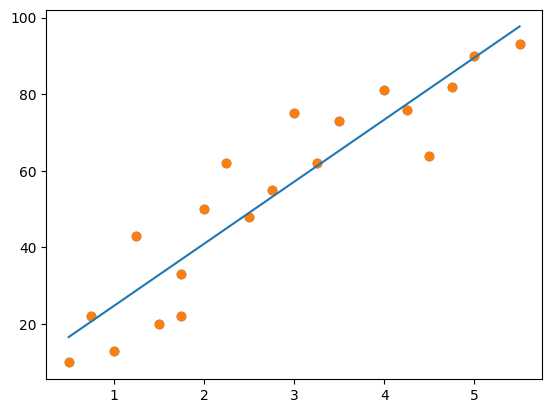

In [7]:
import torch as t 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
class LinerModel(nn.Module):
    def __init__(self):
        super(LinerModel, self).__init__()
        self.linear=nn.Linear(in_features=1,out_features=1)
        self.weight=self.linear.weight
        self.bias=self.linear.bias
    
    def forward(self,x):
        return self.linear(x)
    
    def getParamters(self):
        return self.weight,self.bias
if  __name__ == '__main__':
    
 

    #plt.scatter(x,y)
    x_t=t.tensor([[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50]]).T
    print('初始的tensor，x_t的shape：',x_t.shape)
    y_t=t.tensor([[10,  22,  13,  43,  20,  22,  33,  50,  62, 48,  55,  75,  62,  73,  81,  76,  64,  82,  90,  93]]).T
    print('初始的tensor,y_t的shape：',y_t.shape)
    
    x_n=x_t.numpy().T
    y_n=y_t.numpy().T
    plt.scatter(x_n,y_n)
    print("numpy转换后的数据x_n,shape",x_n.shape,'变成了一个元组')
    print("numpy转换后的数据y_n,shape",y_n.shape,'变成了一个元组')
    linear_module=LinerModel()
    y_pred=linear_module.forward(x_t)
    print("通过一次forwad后得到y predict，其形状是",y_pred.shape)  
    weight,bias=linear_module.getParamters()#获得模型的权参、偏参
    print("模型中参数：",linear_module.parameters())
    print("初始权参值:",weight)
    print("初始偏参值:",bias)
    ########################实例化损失函数，优化函数########################################
    loss_fn=nn.MSELoss()#定义均方误差函数作为损失函数
    optimizer=t.optim.SGD(linear_module.parameters(),lr=0.001)#使用SGD优化函数，对inear_module.parameters()中权参、偏参进行梯度下降法优化，学习率为0.001
    
    iter=1000
    i=0
    for epoch in range(iter):#循环10000次epoch
        print("第",epoch,"次epoch")
        for x,y in zip(x_t,y_t):#对训练集中每一个值都投入模型运算并求得对应梯度，并运行一次梯度下降，完成一个epoch
            i+=1
            y_predict=linear_module(x_t)
            y_predict=y_predict.to(t.float32)#转换为float
            y_t=y_t.to(t.float32)
            loss=loss_fn(y_predict, y_t)
            optimizer.zero_grad()#清空上次的梯度积累
            loss.backward()#损失函数进行backward反向传播
            if iter>900:
                
                print("第",i,"次梯度下降后")
                print("模型中权参梯度：",linear_module.weight.grad)
                print("模型中偏参梯度",linear_module.bias.grad)
            optimizer.step()#根据计算得到的梯度开始梯度下降更新即W=W-∇w*learningrate
    
    ################################输出最终优化的权参和偏参##############################################
    print("优化后得到权参、偏参分别为：",list(linear_module.named_parameters()))
    y_predict=linear_module(x_t).detach().numpy()#通过模型进行预测.detach()实现返回一个新的tensor，从当前计算图中分离下来的，但是仍指向原变量的存放位置,不同之处只是requires_grad为false，得到的这个tensor永远不需要计算其梯度，不具有grad。
    plt.scatter(x_n,y_n)
    plt.plot(x_t,y_predict)
    
    

In [11]:
import torch
d_in = 3
d_out = 4
linear_module2 = nn.Linear(1, d_out)

example_tensor = torch.tensor([[1.,2,3]]).T#这里由于希望输入的是元组（或者说一个样本）所以转置
# applys a linear transformation to the data
transformed = linear_module2(example_tensor)
print('example_tensor', example_tensor.shape)
print('transormed', transformed.shape)
print()
print('We can see that the weights exist in the background\n')
print('W:', linear_module.weight)
print('b:', linear_module.bias)

example_tensor torch.Size([3, 1])
transormed torch.Size([3, 4])

We can see that the weights exist in the background

W: Parameter containing:
tensor([[ 0.2080],
        [ 0.9801],
        [-0.2610],
        [-0.1039]], requires_grad=True)
b: Parameter containing:
tensor([ 0.9507,  0.8385,  0.5706, -0.3836], requires_grad=True)


实验：

基本的linear层的表示：

输入，3个元组构成的矩阵

A: [0.1,0.2,0.3,0.3,0.3]
B: [0.4,0.5,0.6,0.6,0.6]
C: [0.7,0.8,0.9,0.9,0.9]

输出：一个预测标量，以及相关的权参，偏参


In [25]:
import numpy as np 
import torch as t
linear_model=t.nn.Linear(5,1,bias=True)
input=t.tensor([[0.1,0.2,0.3,0.3,0.3],[0.4,0.5,0.6,0.6,0.6],[0.7,0.8,0.9,0.9,0.9]],dtype=t.float32)
y=t.tensor([2,3,2],dtype=t.float32).T
print(y.shape) 
output=linear_model(input)
print('输入自变量的形状',input.shape)
print('输出因变量的形状',output.shape)
print('得到的预测因变量',output)
print('得到的权参矩阵形状',linear_model.weight.shape)
print('得到的偏参形状',linear_model.bias.shape)

torch.Size([3])
输入自变量的形状 torch.Size([3, 5])
输出因变量的形状 torch.Size([3, 1])
得到的预测因变量 tensor([[0.2705],
        [0.2945],
        [0.3186]], grad_fn=<AddmmBackward0>)
得到的权参矩阵形状 torch.Size([1, 5])
得到的偏参形状 torch.Size([1])


C:\Users\tom\AppData\Local\Temp\ipykernel_22896\1423085501.py:5: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3575.)
  y=t.tensor([2,3,2],dtype=t.float32).T


以上的linear层并没有实现模型的拟合，而是自动分配了权参weight，以及偏参bias，以下实现一次梯度下降，从而更新模型，实现拟合。

In [59]:
import torch as t 
import numpy as np 
from torch import Tensor, nn
class Mylinear(nn.Module):
    def __init__(self,input,output):
        super(Mylinear, self).__init__()
        self.Mylinear=nn.Linear(input,output,bias=True)
    def forward(self, input: Tensor) -> Tensor:
       # return super().forward(input)
         return self.Mylinear(input)
    
if  __name__ == "__main__": 
    input=t.tensor([[0.1,0.2,0.3,0.3,0.3],[0.4,0.5,0.6,0.6,0.6],[0.7,0.8,0.9,0.9,0.9]])
    y=t.tensor([[2,3,2]],dtype=t.float32).T
    print(y.shape)
    iter=100
    mylinear=Mylinear(5,1)
    y_pred=mylinear.forward(input)
    print(y_pred.shape)
    loss_fn=nn.MSELoss()#定义均方误差函数作为损失函数

    loss_v=loss_fn(y_pred,y)
    print("没有进行方向传播进行梯度下降之前的误差",loss_v)
  
    #grad=loss_v.backward()#实现反向传播，并进行
    #w_grad=mylinear.Mylinear.weight.grad
    #b_grad=mylinear.Mylinear.bias.grad

    print("初始参数")
    print("权参{}，偏参{}".format(mylinear.Mylinear.weight,mylinear.Mylinear.bias))
    #print("梯度")
    #print("权参梯度{}，偏参梯度{}".format(mylinear.Mylinear.weight.grad,mylinear.Mylinear.bias.grad))
#pytorch 中无法显式的更新参数，必须使用其优化器，但是原理一致
    #mylinear.Mylinear.weight-=0.01*w_grad
    #mylinear.Mylinear.bias-=0.01*b_grad
    optimizer=t.optim.SGD(mylinear.parameters(),lr=0.09)
    optimizer.zero_grad()
    loss_v.backward()
    #通过梯度下降更新权参，偏参
    print("梯度")
    print("权参梯度{}，偏参梯度{}".format(mylinear.Mylinear.weight.grad,mylinear.Mylinear.bias.grad))
    optimizer.step()
    print("再次forwad，计算对应的loss")
    y_pred2=mylinear.forward(input)
    print("优化后拟合函数得到的的预测值",y_pred2)
    print("计算优化后的损失函得到误差",loss_fn(y_pred2,y))

torch.Size([3, 1])
torch.Size([3, 1])
没有进行方向传播进行梯度下降之前的误差 tensor(3.6238, grad_fn=<MseLossBackward0>)
初始参数
权参Parameter containing:
tensor([[-0.2257,  0.2285, -0.1705, -0.0341,  0.3153]], requires_grad=True)，偏参Parameter containing:
tensor([0.3989], requires_grad=True)
梯度
权参梯度tensor([[-1.4617, -1.8305, -2.1993, -2.1993, -2.1993]])，偏参梯度tensor([-3.6883])
再次forwad，计算对应的loss
优化后拟合函数得到的的预测值 tensor([[1.0114],
        [1.3124],
        [1.6135]], grad_fn=<AddmmBackward0>)
计算优化后的损失函得到误差 tensor(1.3249, grad_fn=<MseLossBackward0>)


基于以上的梯度下降方法，现引入iter=100的迭代，实现模型更新

**在每次迭代中，应该先清零梯度，然后进行前向传播，计算损失，进行反向传播，最后更新模型参数**

In [65]:
import torch as t 
import numpy as np 
from torch import Tensor, nn
class Mylinear(nn.Module):
    def __init__(self,input,output):
        super(Mylinear, self).__init__()
        self.Mylinear=nn.Linear(input,output,bias=True)
    def forward(self, input: Tensor) -> Tensor:
       # return super().forward(input)
         return self.Mylinear(input)
    


if  __name__ == "__main__": 
      input=t.tensor([[0.1,0.2,0.3,0.3,0.3],[0.4,0.5,0.6,0.6,0.6],[0.7,0.8,0.9,0.9,0.9]])
      y=t.tensor([[2,3,2]],dtype=t.float32).T
      linear=Mylinear(5,1)
      loss_fn=nn.MSELoss()#定义均方误差函数作为损失函数
      op=t.optim.SGD(linear.parameters(),lr=0.09)
      for i in range(100):
           op.zero_grad()#在进行反向传播之前，应该先调用op.zero_grad()来清除之前的梯度，否则梯度会累加到已有的梯度上
           y_pred=linear.forward(input)
           loss_v=loss_fn(y_pred,y)
           print(loss_v)
           loss_v.backward()
           
           op.step()
           
           

tensor(8.2502, grad_fn=<MseLossBackward0>)
tensor(2.6822, grad_fn=<MseLossBackward0>)
tensor(1.1721, grad_fn=<MseLossBackward0>)
tensor(0.7540, grad_fn=<MseLossBackward0>)
tensor(0.6301, grad_fn=<MseLossBackward0>)
tensor(0.5859, grad_fn=<MseLossBackward0>)
tensor(0.5635, grad_fn=<MseLossBackward0>)
tensor(0.5475, grad_fn=<MseLossBackward0>)
tensor(0.5335, grad_fn=<MseLossBackward0>)
tensor(0.5205, grad_fn=<MseLossBackward0>)
tensor(0.5082, grad_fn=<MseLossBackward0>)
tensor(0.4964, grad_fn=<MseLossBackward0>)
tensor(0.4851, grad_fn=<MseLossBackward0>)
tensor(0.4742, grad_fn=<MseLossBackward0>)
tensor(0.4638, grad_fn=<MseLossBackward0>)
tensor(0.4539, grad_fn=<MseLossBackward0>)
tensor(0.4443, grad_fn=<MseLossBackward0>)
tensor(0.4352, grad_fn=<MseLossBackward0>)
tensor(0.4264, grad_fn=<MseLossBackward0>)
tensor(0.4180, grad_fn=<MseLossBackward0>)
tensor(0.4099, grad_fn=<MseLossBackward0>)
tensor(0.4021, grad_fn=<MseLossBackward0>)
tensor(0.3947, grad_fn=<MseLossBackward0>)
tensor(0.38

模型的改进

以上模型没有加入激活函数，只是一个简单的一层线性全连接网络。

以下改进模型，加入激活层，使用relu激活函数：

---

Activation functions
PyTorch implements a number of activation functions including but not limited to ReLU, Tanh, and Sigmoid. Since they are modules, they need to be instantiated.

---

pytorch中，激活层的使用与之前numpy构建相似，首先实例化一个激活函数，正向传播全连接层input的数据后，得到激活值，传递给下一个全连接层。

In [66]:
relu_fn=nn.ReLU()#实例化Relu函数
x=t.randn(2,dtype=float)
print(x)
print("relu 激活函数很简单，即如果x>0则输出x反之输出0")
y=relu_fn.forward(x)
print(y)



tensor([-0.5379, -0.1048], dtype=torch.float64)
relu 激活函数很简单，即如果x>0则输出x反之输出0
tensor([0., 0.], dtype=torch.float64)


实现将激活函数加入之前线性层之后，注意输出层也必须为一个线性层，而后在外部使用平均误差函数

---
出现问题
1. 单独将数据放入GPU无法训练，还必须将model放入gpu
```python
    x_t=x_t.to(device)#将数据移动到gpu
    y_t=y_t.to(device)#将数据运动到gpu
    linear_module=LinerModel()
    linear_module.to(device)#模型也必须移动到GPU
```
2. 如果想把CUDA tensor格式的数据改成numpy时，需要先将其转换成cpu float-tensor随后再转到numpy格式。 numpy不能读取CUDA tensor 需要将它转化为 CPU tensor
```python
    x_n=x_t.cpu().numpy().T
    y_n=y_t.cpu().numpy().T
```

In [1]:
import torch

if torch.cuda.is_available():
    print("CUDA is available. Training on GPU.")
else:
    print("CUDA is not available. Training on CPU.")


CUDA is available. Training on GPU.


torch.Size([20, 1])
current device cuda
cuda:0
torch.Size([20, 1])
通过一次forwad后得到y predict
模型中参数： <generator object Module.parameters at 0x000001C1C45A0970>
初始权参值: Parameter containing:
tensor([[-0.9588],
        [ 0.2716],
        [ 0.3539],
        [-0.0950],
        [-0.7423],
        [-0.2605],
        [-0.1598],
        [-0.9805],
        [-0.3833],
        [-0.8836]], device='cuda:0', requires_grad=True)
初始偏参值: Parameter containing:
tensor([ 0.5543, -0.1738,  0.1890,  0.1448,  0.7271, -0.3638,  0.7303, -0.7050,
        -0.2668,  0.1630], device='cuda:0', requires_grad=True)
优化后得到权参、偏参分别为： [('weight', Parameter containing:
tensor([[-0.9888],
        [ 1.8178],
        [ 1.4548],
        [-0.0039],
        [-2.3471],
        [-0.2605],
        [-2.2496],
        [-0.9805],
        [-0.3833],
        [-0.8836]], device='cuda:0', requires_grad=True)), ('bias', Parameter containing:
tensor([ 4.9438e-01,  3.3009e+00,  3.2715e+00,  1.9393e-03,  2.3500e+00,
        -3.6384e-01,  5.3797e+0

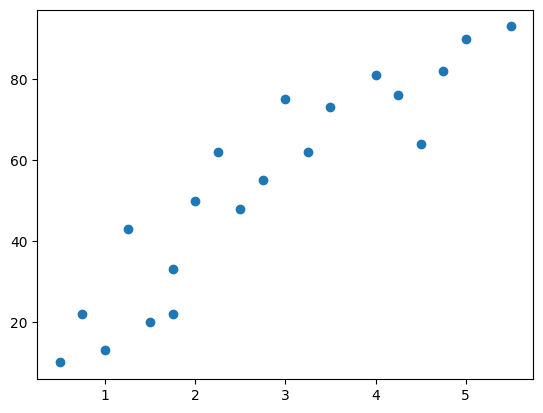

In [2]:
import torch as t 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
class LinerModel(nn.Module):
    def __init__(self):
        super(LinerModel, self).__init__()
        self.linear1=nn.Linear(in_features=1,out_features=10)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(in_features=10,out_features=1)
        self.weight=self.linear1.weight
        self.bias=self.linear1.bias
    
    def forward(self,x):
        x=self.linear1(x)
        x=self.relu1(x)
        x=self.linear2(x)
        return x
    
    def getParamters(self):
        return self.weight,self.bias
if  __name__ == '__main__':
    
 

    #plt.scatter(x,y)
    x_t=t.tensor([[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50]]).T
    print(x_t.shape)
    y_t=t.tensor([[10,  22,  13,  43,  20,  22,  33,  50,  62, 48,  55,  75,  62,  73,  81,  76,  64,  82,  90,  93]]).T
    
    device="cuda" if t.cuda.is_available() else "cpu"
    print("current device",device)
    x_t=x_t.to(device)#将数据移动到gpu
    y_t=y_t.to(device)#将数据运动到gpu
    
    print(x_t.device)
    x_n=x_t.cpu().numpy().T
    y_n=y_t.cpu().numpy().T
    print(x_t.shape)
    linear_module=LinerModel()
    linear_module.to(device)#模型也必须移动到GPU
    y_pred=linear_module.forward(x_t)
    print("通过一次forwad后得到y predict")
    weight,bias=linear_module.getParamters()
    print("模型中参数：",linear_module.parameters())
    print("初始权参值:",weight)
    print("初始偏参值:",bias)
    ########################实例化损失函数，优化函数########################################
    loss_fn=nn.MSELoss()#定义均方误差函数作为损失函数
    optimizer=t.optim.SGD(linear_module.parameters(),lr=0.001)#使用SGD优化函数，对inear_module.parameters()中权参、偏参进行梯度下降法优化，学习率为0.001
    
    iter=1000
    i=0
    for epoch in range(iter):#循环10000次epoch
        #print("第",epoch,"次epoch")
        for x,y in zip(x_t,y_t):#对训练集中每一个值都投入模型运算并求得对应梯度，并运行一次梯度下降，完成一个epoch
            i+=1
            y_predict=linear_module(x_t)
            y_predict=y_predict.to(t.float32)
            y_t=y_t.to(t.float32)
            loss=loss_fn(y_predict, y_t)
            optimizer.zero_grad()#清空上次的梯度积累
            loss.backward()#损失函数进行backward反向传播
            if iter>9000:
                
                print("第",i,"次梯度下降后")
                print("模型中权参梯度：",linear_module.weight.grad)
                print("模型中偏参梯度",linear_module.bias.grad)
            optimizer.step()#根据计算得到的梯度开始梯度下降更新即W=W-∇w*learningrate
    
    ################################输出最终优化的权参和偏参##############################################
    print("优化后得到权参、偏参分别为：",list(linear_module.named_parameters()))
    y_predict=linear_module(x_t).detach().cpu().numpy()#通过模型进行预测.detach()实现返回一个新的tensor，从当前计算图中分离下来的，但是仍指向原变量的存放位置,不同之处只是requires_grad为false，得到的这个tensor永远不需要计算其梯度，不具有grad。
    plt.scatter(x_n,y_n)
    plt.plot(x_n,y_predict.T)

基于以上代码，重现华盛顿大学 pytroch课程

首先定义相关的待拟合函数
$$y=4 \times sin(\pi \times x)\times cos(6 \times x^2)$$

并展现相关的图像

torch.Size([200, 1]) torch.Size([200, 1])


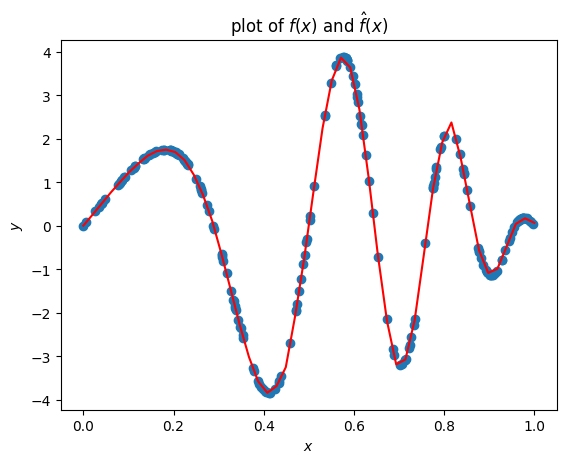

In [9]:
%matplotlib inline
import torch 
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

class simpleNet(nn.Module):
    def __init__(self,input,output):
        super(simpleNet, self).__init__()
        self.linear1=nn.Linear(in_features=input, out_features=200)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(in_features=200, out_features=300)
        self.relu2=nn.ReLU()
        self.linear3=nn.Linear(in_features=300, out_features=output)
    
    def forward(self, x):
        x=self.linear1(x)
        x=self.relu1(x)
        x=self.linear2(x)
        x=self.relu2(x)
        x=self.linear3(x)
        return x
if __name__=='__main__':
    

    d = 1
    n = 200
    X = torch.rand(n,d)
    iterm=50000
    y = 4 * torch.sin(np.pi * X) * torch.cos(6*np.pi*X**2)
    print(X.shape, y.shape)
 
################################################################
    net=simpleNet(input=d,output=d)
    loss_fn=nn.MSELoss()
    opt=torch.optim.Adam(params=net.parameters(),lr=0.01)
    for epoch in range(iterm):
         
            y_pred=net.forward(X)
            loss=loss_fn(y_pred,y)
            opt.zero_grad()
            loss.backward()
            opt.step()#更新权参、偏参
    
    X_grid = torch.from_numpy(np.linspace(0,1,50)).float().view(-1, d)
    y_hat = net(X_grid)
    plt.scatter(X.numpy(), y.numpy())
    plt.plot(X_grid.detach().numpy(), y_hat.detach().numpy(), 'r')
    plt.title('plot of $f(x)$ and $\hat{f}(x)$')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.show()

Sequential
---
除了使用创建modle类，再进行模型训练方法，也可以通过Sequenltal将模型串联，开始运算，但这种方式正规性不强，与tensorflow类似。
但是可以将Sequential集成到modle类中，实现序列包装，并在forwrd中直接调用，可以避免出错。

```python
class Net(nn.Module):
    def __init__(self, input_num, hidden_num, output_num):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_num, hidden_num),
            nn.ReLU(),
            nn.Linear(hidden_num, output_num),
            nn.ReLU()
        )

    def forward(self, input):
        return self.net(input)
 
```
__init__ 方法中不为每一层显式地创建一个实例类层，同时在forward中直接调用Squential对象进行运算即可。

Many times, we want to compose Modules together. torch.nn.Sequential provides a good interface for composing simple modules.

## 实验
### 实验1 多元函数
在以上案例基础上，进一步实现多元回归的神经网络，包括
1. 数据获取
2. 数据观察
3. 对数据的标准化
4. 实现mini-batch载入
5. 通过train、test数据划分验证数据
6. 结合之前知识，实验模型优化
总之，实现一个完整的面向数值多元数据的神经网络构建流程

参考
* [神经网络多元回归](https://blog.csdn.net/qq_39567427/article/details/111935833)

In [10]:
!pip install torchsummary

载入数据，进行基本数据观察，数据来源于sklearn

----
注意层数与神经元确定个数：

[参考](https://zhuanlan.zhihu.com/p/100419971)

c:\Users\tom\.conda\envs\luck\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


载入数据tpye <class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
自变量多元数据：
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
      CRIM    ZN  INDUS CHAS    NOX     RM   AGE   DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.09   1  296.0     15.3   

       B  LSTAT  
0  396.9   4.98  
自变量数据类型： <class 'numpy.ndarray'> 数据形状： (506, 13)
因变量数据类型： <class 'numpy.ndarray'> 数据形状： (506, 1)
训练集形状 (303, 13) (303, 1)
测试集形状 (203, 13) (203, 1)
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 15]             210
              ReLU-2                   [-1, 15]               0
            Linear-3                   [-1, 15]             240
              ReLU-4                   [-1, 15]               0
    

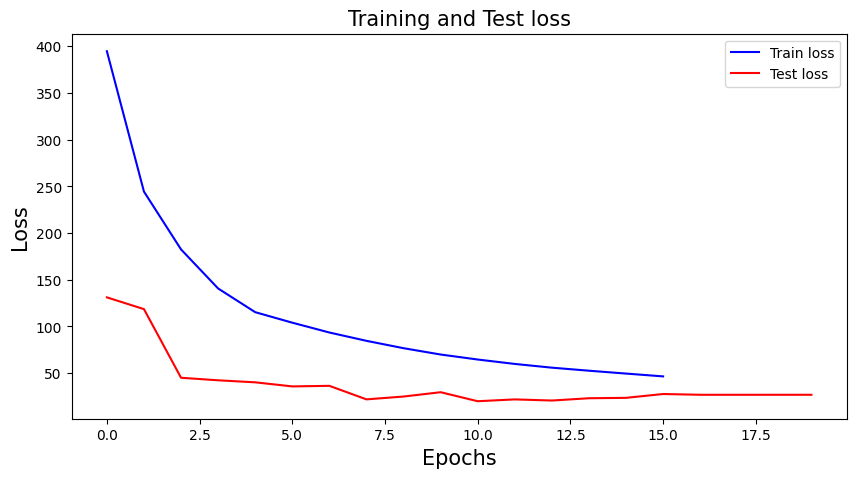

(203, 1)
(203, 1)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202]


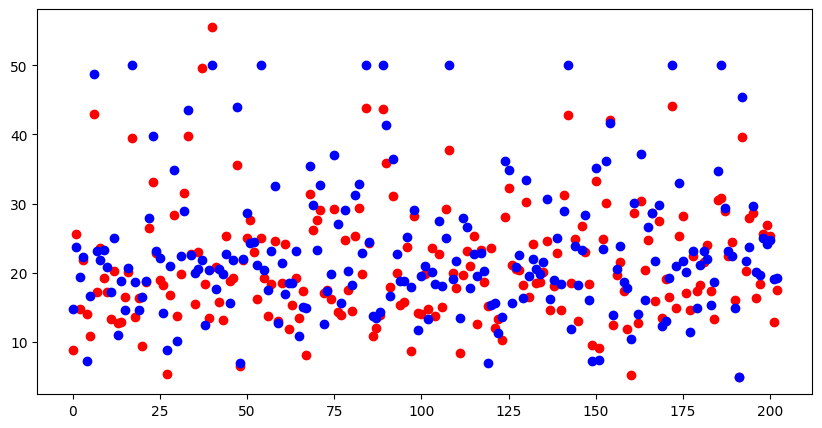

In [27]:
from sklearn.datasets import fetch_openml


from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from torch import nn
import torch
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
from sklearn.preprocessing import scale
from torchsummary import summary
from matplotlib.font_manager import FontProperties

class MyNet(nn.Module):
    def __init__(self,input,output) -> None:
        super(MyNet, self).__init__()
        self.nn=nn.Sequential(
            nn.Linear(in_features=13,out_features=15),
            nn.ReLU(),
            nn.Linear(in_features=15,out_features=15),
            nn.ReLU(),
            nn.Linear(in_features=15,out_features=1),
            nn.ReLU()
        )
        #self.linear1=nn.Linear(in_features=13,out_features=20)
        #self.relu1=nn.ReLU()
        #self.linear2=nn.Linear(in_features=20,out_features=1)
        #self.relu2=nn.ReLU()
        
    def forward(self,x):
        return self.nn(x)
        #x=self.linear1(x)
        #x=self.relu1(x)
        #x=self.linear2(x)
        #x=self.relu2(x)
        
        return x

if __name__ == '__main__':

    boston = fetch_openml(data_id=531)
    #X, y = boston.data, boston.target
    print("载入数据tpye",type(boston))
    #获取数据键
    print(boston.keys())
    #print("数据集描述：",boston['DESCR'])
    print("自变量多元数据：")
    print(boston['feature_names'])
    print(boston['data'][0:1])
    #print("因变量：")
    #print(boston['target'])
    ################################################################
    #数据划分#
    x=boston['data'].values
    print("自变量数据类型：",type(x),"数据形状：",x.shape)
    y=boston['target'].values.reshape(-1,1)
    print("因变量数据类型：",type(y),"数据形状：",y.shape)
    ################################################################
    #数据预处理#
    ## 1. 标准化因变量#，在此标准化非常重要，没有标准化得到模型基本不能使用
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    ## 2. 数据打乱顺序
    x,y=shuffle(x,y)
    ## 3. 划分train，test
    x_size=x.shape[0]
    train_size=int(x_size*0.6)
    x_train,x_test,y_train,y_test=x[0:train_size,:],x[train_size:,:],y[0:train_size,:],y[train_size:,:]
    print("训练集形状",x_train.shape,y_train.shape)
    print("测试集形状",x_test.shape,y_test.shape)
    #数据载入tensor
    ## 1.转换numpy到tensor张量
    x_train =torch.from_numpy(x_train)
    y_train =torch.from_numpy(y_train)
    x_test =torch.from_numpy(x_test)
    y_test =torch.from_numpy(y_test)
    ## 判断cuda是否可用，选择gpu或cpu载入数据处理
    device="cuda" if torch.cuda.is_available() else "cpu"
    print(device)
 
    x_train=x_train.to(torch.float32).to(device)
    y_train=y_train.to(torch.float32).to(device)
    x_test=x_test.to(torch.float32).to(device)
    y_test=y_test.to(torch.float32).to(device)
    ################################################################
    ## 1. 构建模型实例,注意要载入gpu或cpu中与数据对应,summary输出网络的结构信息
    net=MyNet(input=13,output=1).to(device)
 
    summary(net, input_size=(13,))
    
    ## 2.超参设置
    learning_rate=0.02
    epochs=20
    batch_size=20
    total_steps=int(x_train.shape[0]/batch_size)
    print("完成一个epoch，需要读取",total_steps,"个batchs")
    ## 3.创建损失函数，优化函数实例
    loss_fn=nn.MSELoss()
    opt=torch.optim.Adam(params=net.parameters(),lr=learning_rate)
    ## 4.创建list记录训练loss，以及最后的test loss，作为对比
    train_loss_list=[]
    test_loss_list=[]
    train_acc_list=[]
    test_acc_list=[]
    step_loss=[]
    ## 4.训练模型
    for step in range(epochs):#循环1000个epochs
        print("epoch：",step)
        for i in range(total_steps):#内部完成基于batch的一个epochs数据读取
            x_train_batch=x_train[step * batch_size:(step + 1) * batch_size, :]
            y_train_batch=y_train[step * batch_size:(step + 1) * batch_size, :]
       
 
          
            #y_train=y_train.to(torch.float32)
            #x_train=x_train.to(torch.float32)
            y_pred=net(x_train_batch.to(device))
            loss=loss_fn(y_pred,y_train_batch)
            #print(loss.cpu().detach().numpy())
            step_loss.append(loss.cpu().detach().numpy())#记录每一个batch的loss值
            opt.zero_grad()
            loss.backward()
            opt.step()
       
        train_loss=np.mean(step_loss)#计算每一个epoch的平均loss
        train_loss_list.append(train_loss)
        y_predict=net(x_test)
        test_loss=loss_fn(y_predict, y_test)
        test_loss_list.append(test_loss.cpu().detach().numpy())
  
        print("第",step,"个epoch")
        print("train loss:",train_loss)
        print("test loss:",test_loss)
        
    fig = plt.gcf()
    fig.set_size_inches(10, 5)

    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.plot(train_loss_list, 'blue', label='Train loss')
    plt.plot(test_loss_list, 'red', label='Test loss')
    plt.legend(loc='best')
    plt.title('Training and Test loss', fontsize=15)
    plt.show()
    ################################################################
    # 通过x_test预测数据并与实际值对比
    y_predict=net.forward(x_test)
    y_pred=y_predict.cpu().detach().numpy()
    y_t=y_test.cpu().detach().numpy()
    print(y_pred.shape)
    print(y_t.shape)
    predciton=np.arange(len(y_pred))
    print(predciton)
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    plt.scatter(predciton,y_pred,color='red')
    plt.scatter(predciton,y_t,color='blue')
    

实验 1.0.1 基于环境数据实现汞含量的深度学习

实验步骤
1. 读取hg数据（不包含分类数据）
2. 实现因变量自变量的tensor转换

(753, 1)
(753, 19)
训练集形状 (451, 19) (451, 1)
测试集形状 (302, 19) (302, 1)
cuda
实现训练集，测试集因变量、自变量的tensor转换
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]           2,000
              ReLU-2                  [-1, 100]               0
            Linear-3                   [-1, 50]           5,050
              ReLU-4                   [-1, 50]               0
            Linear-5                    [-1, 1]              51
Total params: 7,101
Trainable params: 7,101
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.03
----------------------------------------------------------------
完成一个epoch，需要读取 22 个batchs
epoch： 0
第 0 个epoch
train loss: 7.17056
test loss: tensor(372.0953, device='cuda:0', grad_fn=<MseLossBackward0>)

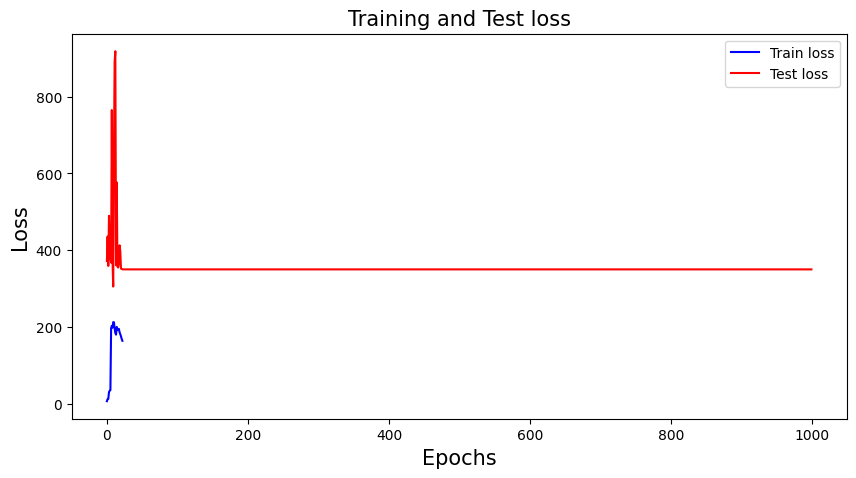

(302, 1)
(302, 1)


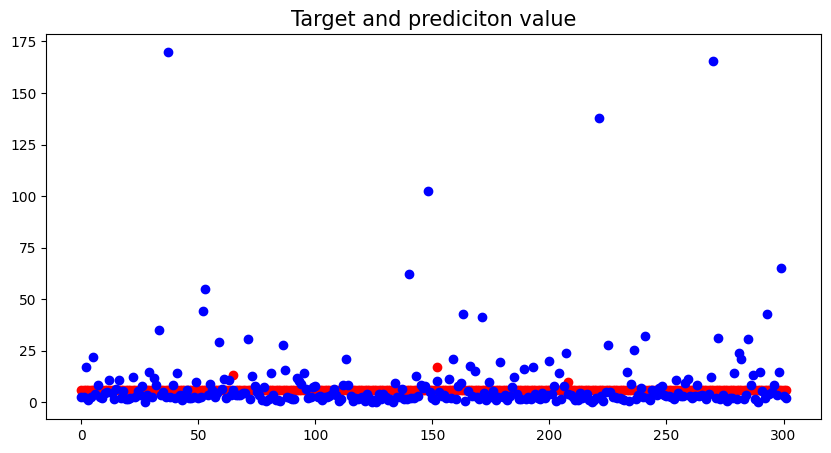

In [1]:
from sklearn.datasets import fetch_openml


from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from torch import nn
import torch
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
from sklearn.preprocessing import scale
from torchsummary import summary
from matplotlib.font_manager import FontProperties


class linear(nn.Module):
    def __init__(self,input,output):
        super(linear, self).__init__()
        self.net1=nn.Linear(input,100)
        self.net2=nn.ReLU()
        self.net3=nn.Linear(100,50)
        self.net4=nn.ReLU()
        self.net5=nn.Linear(50,1)
    def forward(self,input):

        x=self.net1(input)
        x=self.net2(x)
        x=self.net3(x)
        x=self.net4(x)
        x=self.net5(x)
        return x
        
def tensor_condition(x):     
    print("Shape:", x.shape)
    print("Data type:", x.dtype)
    print("Device:", x.device)
    print("Requires grad:", x.requires_grad)

if __name__ == '__main__':
    hg=pd.read_csv('data\hg1.csv')
    #print(hg.describe())
    y=hg['Hg_conc'].to_numpy().reshape(-1,1)# 设置因变量
    x=hg.drop('Hg_conc',axis=1,inplace=False).to_numpy()
    print(y.shape)
    print(x.shape)

      ################################################################
    #数据预处理#
    ## 1. 标准化因变量#，在此标准化非常重要，没有标准化得到模型基本不能使用
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
  
    ## 2. 数据打乱顺序
    x,y=shuffle(x,y)
    ## 3. 划分train，test
    x_size=x.shape[0]
    train_size=int(x_size*0.6)
    x_train,x_test,y_train,y_test=x[0:train_size,:],x[train_size:,:],y[0:train_size,:],y[train_size:,:]
    print("训练集形状",x_train.shape,y_train.shape)
    print("测试集形状",x_test.shape,y_test.shape)
    #数据载入tensor
    ## 1.转换numpy到tensor张量
    x_train =torch.from_numpy(x_train)
    y_train =torch.from_numpy(y_train)
    x_test =torch.from_numpy(x_test)
    y_test =torch.from_numpy(y_test)
    ## 判断cuda是否可用，选择gpu或cpu载入数据处理
    device="cuda" if torch.cuda.is_available() else "cpu"
    print(device)
    print('实现训练集，测试集因变量、自变量的tensor转换')
    x_train=x_train.to(torch.float32).to(device)
    y_train=y_train.to(torch.float32).to(device)
    x_test=x_test.to(torch.float32).to(device)
    y_test=y_test.to(torch.float32).to(device)
    #tensor_condition(x_train)
    #tensor_condition(y_train)
    #tensor_condition(x_test)
    #tensor_condition(y_test)
    ################################################################
    ## 1. 构建模型实例,注意要载入gpu或cpu中与数据对应,summary输出网络的结构信息
    net=linear(input=19,output=1).to(device)
 
    summary(net, input_size=(19,))
    ## 2.超参设置
    learning_rate=0.02
    epochs=1000
    batch_size=20
    total_steps=int(x_train.shape[0]/batch_size)
    print("完成一个epoch，需要读取",total_steps,"个batchs")
    ## 3.创建损失函数，优化函数实例
    loss_fn=nn.MSELoss()
    opt=torch.optim.Adam(params=net.parameters(),lr=learning_rate)
    ## 4.创建list记录训练loss，以及最后的test loss，作为对比
    train_loss_list=[]
    test_loss_list=[]
    train_acc_list=[]
    test_acc_list=[]
    step_loss=[]
    ## 4.训练模型
    for step in range(epochs):#循环1000个epochs
        print("epoch：",step)
        for i in range(total_steps):#内部完成基于batch的一个epochs数据读取
            x_train_batch=x_train[step * batch_size:(step + 1) * batch_size, :]
            y_train_batch=y_train[step * batch_size:(step + 1) * batch_size, :]
       
 
          
            #y_train=y_train.to(torch.float32)
            #x_train=x_train.to(torch.float32)
            y_pred=net(x_train_batch.to(device))
            loss=loss_fn(y_pred,y_train_batch)
            #print(loss.cpu().detach().numpy())
            step_loss.append(loss.cpu().detach().numpy())#记录每一个batch的loss值
            opt.zero_grad()
            loss.backward()
            opt.step()
       
        train_loss=np.mean(step_loss)#计算每一个epoch的平均loss
        train_loss_list.append(train_loss)
        y_predict=net(x_test)
        test_loss=loss_fn(y_predict, y_test)
        test_loss_list.append(test_loss.cpu().detach().numpy())
  
        print("第",step,"个epoch")
        print("train loss:",train_loss)
        print("test loss:",test_loss)
        
    fig = plt.gcf()
    fig.set_size_inches(10, 5)

    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.plot(train_loss_list, 'blue', label='Train loss')
    plt.plot(test_loss_list, 'red', label='Test loss')
    plt.legend(loc='best')
    plt.title('Training and Test loss', fontsize=15)
    plt.show()
      ################################################################
    # 通过x_test预测数据并与实际值对比
    y_predict=net.forward(x_test)
    y_pred=y_predict.cpu().detach().numpy()
    y_t=y_test.cpu().detach().numpy()
    print(y_pred.shape)
    print(y_t.shape)
    predciton=np.arange(len(y_pred))
    
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    plt.title('Target and prediciton value', fontsize=15)

    plt.scatter(predciton,y_pred,color='red',label='Prediciton')
    plt.scatter(predciton,y_t,color='blue',label='target')
 

# Dataloader 与 DataSet 
为了统一数据加载和处理代码，pytorch 提供了两个类用于处理数据加载，分别是 torch.utils.data.DataSet 和 torch.utils.data.DataLoader，

通过这两个类可以使得数据集加载和预处理代码与模型训练代码脱钩，从而获得更好的代码模块化和代码可读性。
>[pytorch中参考] https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

----
Creating a Custom Dataset for your files
为文件创建自定义数据集
A custom Dataset class must implement three functions: __init__, __len__, and __getitem__.  

In [4]:
r=zip(([1, 2, 3], 'a'), ([4, 5, 6], 'b'), ([7, 8, 9], 'c'))
print(r)

### 实验1.1 多元回归函数 进阶

在pytorch实现多元回归函数基础上，对函数进行进一步优化，并上传kaggle

1. 使用pythroch 的 Dataloader数据包装器包装数据
2. 加入权重衰减
3. 加入dropout
4. 实现k折交叉验证

---

参考[权重衰减 dropout](https://tangshusen.me/Dive-into-DL-PyTorch/#/chapter03_DL-basics/3.13_dropout)

---
0. 首先应该进行数据划分，再进行dataset创建和dataloader处理，可采用sklearn中数据划分方法train_test_split
1. DataLoader Dataset

* Dataset的作用是通过Dataset将现有数据进行包装；
* 包装好的数据就可以被DataLoader调用，调用的方法中就包括确定批次batch-size，是否shuffle等，是否normalization
#### 1. DataSet DataLoader
1.1 Dataset

torch.utils.data.Dataset是代表这一数据的抽象类（也就是基类）。我们可以通过继承和重写这个抽象类实现自己的数据类，只需要定义__len__和__getitem__这个两个函数

如果在类中定义了__getitem__()方法，那么实例对象（假设为P）就可以这样P[key]取值。当实例对象做P[key]操作时，就会调用类中的__getitem__()方法。
* The __len__ function returns the number of samples in our dataset.
* The __getitem__ function loads and returns a sample from the dataset at the given index idx. 根据索引返回张量数据
 
[参考1](https://blog.csdn.net/He3he3he/article/details/105441083)

[参考2](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

[magic method](https://zhuanlan.zhihu.com/p/329962624)

1.2 DataLoader

定义Dataset后，就可以将dataset实例喂给Dataloader，完成shuffer，batchsize工作，特别是batchsize，简化了批次夺取数据的代码。
Preparing your data for training with DataLoaders
The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled 

#### 2. weight_decay
权重衰减参考class1，简单就是通过在loss函数权参平方和值乘以超参/2，改善方程过拟合现象
> 权值衰减一直以来是一种经常被使用的抑制过拟合方法，该方法通过在学习过程中对大的权重进行惩罚，来抑制过拟合。
**很多过拟合就是因为权重参数取值过大照成的**


[参考](https://blog.csdn.net/program_developer/article/details/80867468)

L2正则化的目的就是为了让权重衰减到更小的值，在一定程度上减少模型过拟合的问题，所以权重衰减也叫L2正则化。

对应公式：

$$C=C_0+\frac{\lambda}{2} \times \sum_w {w^2} \cdots  (1)$$

其中$C,C_0$分别为原误差函数、更新后误差函数$\sum_w {w^2}$为所有层中权参和,n为训练集数

pytorch中通过在优化函数中指定weight_decay超参的值就可以实现L2正则化
```python
optimizer = torch.optim.SGD(params=net.parameters(), lr=lr, weight_decay=wd)
```
如果只想针对某些参数，分别为它们构造一个优化器实例即可：
```python
optimizer_w = torch.optim.SGD(params=[net.weight], lr=lr, weight_decay=wd) # 对权重参数衰减
optimizer_b = torch.optim.SGD(params=[net.bias], lr=lr)  # 不对偏差参数衰减
```

---

#### 3. Dropout
pytorch中推荐使用 nn.Dropout，而不使用nn.functional.dropout函数。因为一般只有训练时才使用 Dropout，在验证或测试时不需要使用 Dropout。使用 nn.Dropout时，如果调用 model.eval() ，模型的 Dropout 层都会关闭；但如果使用 nn.functional.dropout，在调用 model.eval() 时，不会关闭 Dropout。
> * [参考](https://zhuanlan.zhihu.com/p/575456981)


----
 **同优化前后的多元函数对比，可以发现过拟合现象得到了很大改善**


In [28]:
def loss_fig(trian_loss_list,test_loss_list):       
        fig = plt.gcf()
        fig.set_size_inches(10, 5)

        plt.xlabel('Epochs', fontsize=15)
        plt.ylabel('Loss', fontsize=15)
        plt.plot(train_loss_list, 'blue', label='Train loss')
        plt.plot(test_loss_list, 'red', label='Test loss')
        plt.legend(loc='best')
        plt.title('Training and Test loss', fontsize=15)
        plt.show()

In [ ]:
 
from torch.utils.data import Dataset, DataLoader
import torch 
import torch.nn as nn 
import torch.functional as F
from sklearn.model_selection import train_test_split as split
import numpy as np 
from sklearn.preprocessing import StandardScaler

class MyNet2(nn.Module):
    def __init__(self,input,hidden,output,drop_p=0.5):
        super(MyNet2,self).__init__()
        
        self.l1=nn.Linear(input,hidden)
        self.drop1=nn.Dropout(p=drop_p)
        self.r1=nn.ReLU()
        self.l2=nn.Linear(hidden,hidden)
        self.drop2=nn.Dropout(p=drop_p)
        self.r2=nn.ReLU()
        self.l3=nn.Linear(hidden,output)
        self.drop3=nn.Dropout(p=drop_p)
        self.r3=nn.ReLU()
    
    def forward(self,x):
        x=self.l1(x)
        x=self.drop1(x)
        x=self.r1(x)
        x=self.l2(x) 
        x=self.drop2(x)
        x=self.r2(x)
        x=self.drop3(x)
        x=self.r3(x)
        return x
    
class MyDataset(Dataset):
    def __init__(self,data,target,device='cuda') -> None:
        super().__init__()
        self.len=len(data)
        self.data=torch.from_numpy(data).float().to(device)#注意数据类型转换
        self.target=torch.from_numpy(target).float().to(device)#注意数据类型转换
        
    def __len__(self) -> int:
        return self.len
    
    def __getitem__(self,index):
        return self.data[index],self.target[index]


        
if __name__ == '__main__':
    try:
        print(" 载入数据tpye",type(boston))
    except NameError:
        boston = load_boston()                                
        print("载入数据tpye",type(boston))

    #获取数据键
    print(boston.keys())
    #print("数据集描述：",boston['DESCR'])
    print("自变量多元数据：")
    print(boston['feature_names'])
    print(boston['data'][0:1])
    #print("因变量：")
    #print(boston['target'])
    ################################################################
    #因变量自变量提取#
    x=boston['data'].values
    print("the shape of x",x.shape)
    print("自变量数据类型：",type(x),"数据形状：",x.shape)
     
    y=boston['target'].values.reshape(-1,1)
    print("因变量数据类型：",type(y),"数据形状：",y.shape)
    ################################################################
    #对变量进行标准化
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    #数据划分#
    x_train,x_test,y_train,y_test=split(x,y,test_size=0.3,random_state=6)
    #############################使用DataSet包装数据，DataLoader读取数据###################################
    ################################并载入本机gpu或cpu################################`
    device="cuda" if torch.cuda.is_available() else "cpu"
    print("current device: " + device)
    train_data=MyDataset(x_train,y_train,device=device)
    test_data=MyDataset(x_test,y_test)
 
    print("数据集长度：{}".format(train_data.len))
    train_data_loader=DataLoader(train_data,shuffle=True,batch_size=20)
    test_data_loader=DataLoader(test_data,shuffle=False,batch_size=20)
    #x,y=next(iter(train_data_loader))#iter调用train_data_loader de 调用__iter__()方法，该方法返回一个迭代器。然后，next()在该迭代器上调用__next__()方法以获得第一次迭代。再次运行next()将获得迭代器的第二项，依此类推。
    print("dataloder 处理后，一个batch size的长度：",len(x))
    ################################super parameters################################
    learning_rate=0.02
    epochs=100
    weight_decay=0.005
    ################################create modle,opt,loss_fn################################
    net=MyNet2(input=13,hidden=15,output=1)
    net.to(device)
    opt=torch.optim.Adam(params=net.parameters(),lr=learning_rate,weight_decay=weight_decay)
    loss_fn=nn.MSELoss()
    ################################create loss accury list###################################
    test_batch_loss=[]
    train_batch_loss=[]
    train_epoch_loss_list=[]
    test_epoch_loss_list=[]
    ################################训练模型，注意载入数据时候的dataloader 方法
    for epoch in range(epochs):
        for x_batch,y_batch in train_data_loader:# 每次读取一个batch，循环遍历一次epoch
  
            y_batch_pred=net(x_batch)
            loss=loss_fn(y_batch_pred,y_batch)
            opt.zero_grad()
            loss.backward()
            opt.step()
            train_batch_loss.append(loss.cpu().detach().numpy())
        train_epoch_loss=np.mean(train_batch_loss)
        train_epoch_loss_list.append(train_epoch_loss)
        
        
        net.eval()# 由于dropout存在在进行test的时候，需要关闭droput层以进行测试
        for x_batch,y_batch in test_data_loader:# 每次读取一个batch，循环遍历一次epoch

            y_batch_pred=net(x_batch)
            loss=loss_fn(y_batch_pred,y_batch)
            opt.zero_grad()
            loss.backward()
            opt.step()
            test_batch_loss.append(loss.cpu().detach().numpy())       
        
        test_epoch_loss=np.mean(test_batch_loss)
        test_epoch_loss_list.append(test_epoch_loss)

        if epoch%10==0:
           print("第{}次epoch的train loss为：{}".format(epoch,train_epoch_loss))
           print("第{}次epoch的test loss为：{}".format( epoch,test_epoch_loss))
           print("################################")
    loss_fig(train_epoch_loss_list,test_epoch_loss_list)
            
            
        
    

### 实验1.2  环境科学多元函数建模

实验目的： 

在之前环境科学数据实验基础上

1. 加入dropout，L2，改善过拟合现象
2. 增加准确率曲线
3。 使用dataset，dataloader
4. 使用交叉验证方法（由于数据量过小）


the lenght of dataset 753
the length of train size is 602,  test size is 151
R^2 Score: -21.60496563767013
Epoch 1/500.. Train loss: 282.4595.. Test loss: 244.1742
R^2 Score: -7.026420394924468
Epoch 2/500.. Train loss: 254.4564.. Test loss: 239.0384
R^2 Score: -21.498866435698787
Epoch 3/500.. Train loss: 231.0630.. Test loss: 257.9426
R^2 Score: -16.730943882349205
Epoch 4/500.. Train loss: 225.7347.. Test loss: 257.2349
R^2 Score: -1.8549396306293255
Epoch 5/500.. Train loss: 254.6168.. Test loss: 281.4932
R^2 Score: -4.156304685077166
Epoch 6/500.. Train loss: 221.7441.. Test loss: 252.1355
R^2 Score: -8.064842055253623
Epoch 7/500.. Train loss: 219.6005.. Test loss: 252.4756
R^2 Score: -3.071234097266996
Epoch 8/500.. Train loss: 229.0547.. Test loss: 269.4002
R^2 Score: -1.165152379563497
Epoch 9/500.. Train loss: 216.4250.. Test loss: 295.8909
R^2 Score: -3.4360174760076667
Epoch 10/500.. Train loss: 223.6043.. Test loss: 263.3299
R^2 Score: -1.8718211753340421
Epoch 11/500.. Tr

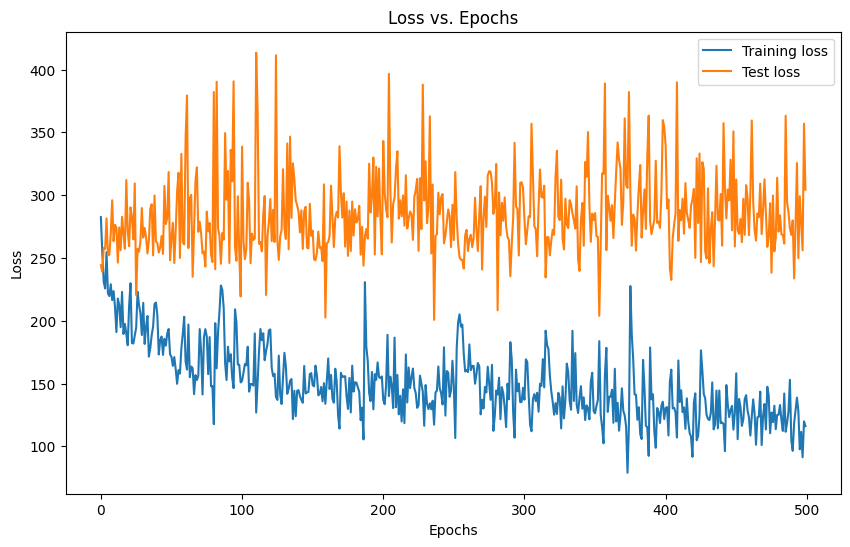

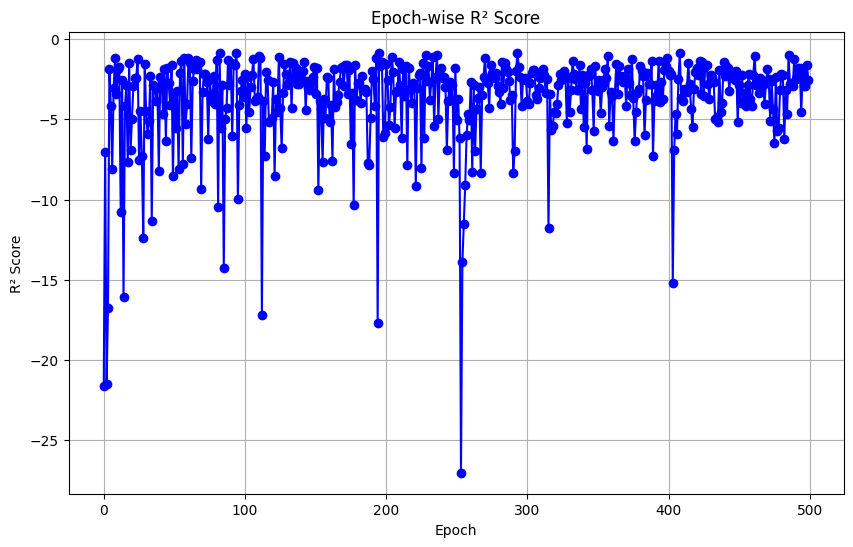

In [7]:
import os 
import pandas as pd 
import numpy as np 
import torch 
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
class HgDataset(Dataset):
    def __init__(self,file_path,tranform=None,traget_tranform=None):
        """_summary_

        Args:
            file_path (_type_): _description_
            tranform (_type_, optional): _description_. Defaults to None.
            traget_tranform (_type_, optional): _description_. Defaults to None.
        """
        self.data=pd.read_csv(file_path)
        self.y=self.data['Hg_conc'].to_numpy().reshape(-1,1)# 设置因变量
        self.x=self.data.drop('Hg_conc',axis=1,inplace=False).to_numpy()
        if tranform:
            self.x=tranform(self.x)
        if traget_tranform:
            self.y=traget_tranform(self.y)
    



    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
        '''torch.is_tensor(idx): 这个函数检查idx是否是一个PyTorch张量（torch.Tensor）。在某些情况下，
        尤其是在使用高级索引或者批处理时，索引可能会以张量的形式给出。这个检查是为了确定是否需要将张量索引转换成Python列表，以便后续处理。

         idx.tolist(): 如果idx确实是一个张量，tolist()方法将这个张量转换成一个Python列表。这是必要的，
         因为在接下来的数据检索过程中，通常需要索引作为整数或者整数列表来使用，而不是张量。'''
        if torch.is_tensor(index):
            index = index.tolist()

        y_i=self.y[index]
        x_i=self.x[index]
        return x_i,y_i
    

def my_transform(batch,device):
    x,y=zip(*batch)
    #print(type(x))
    x=np.array(x)
    y=np.array(y)

    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    x=torch.tensor(x,dtype=torch.float32).to(device)
    y=torch.tensor(y,dtype=torch.float32).to(device)
    return x,y

class MyModel(nn.Module):
    def __init__(self,input,output,drop_p=0.3):
      
            super(MyModel,self).__init__()
            self.net=nn.Sequential(
                nn.Linear(input,100),
                nn.BatchNorm1d(100),
                nn.Dropout(p=drop_p),
                nn.ReLU(),
                nn.Linear(100,30),
                nn.BatchNorm1d(30),
                nn.Dropout(p=drop_p),
                nn.ReLU(),
                nn.Linear(30,output)
            )
    def forward(self,input):
            return self.net(input)


if __name__ == "__main__":
    #设置超参

    
    dataset=HgDataset(file_path='data\hg1.csv')
    dataset_len=len(dataset)
    print('the lenght of dataset',dataset_len)
    train_size=int(0.8*dataset_len)
    test_size=dataset_len-train_size
    print("the length of train size is {},  test size is {}".format(train_size,test_size))
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    batch=20
    train_dataloader=DataLoader(train_dataset,batch_size=batch,shuffle=True,collate_fn=lambda x:my_transform(x,device))
    test_dataloader=DataLoader(test_dataset,batch_size=batch,shuffle=True,collate_fn=lambda x:my_transform(x,device))

        ################################super parameters################################
    learning_rate=0.02
  
    weight_decay=0.005
    epochs=500
    drop_p=0.3#drop 的概率
 
    ################################create modle,opt,loss_fn################################
    ### 模型构建以及参数设定
    model=MyModel(input=19,output=1,drop_p=0.23)
    model.to(device)
    loss_fn=nn.MSELoss()
    opt=torch.optim.Adam(params=model.parameters(),lr=learning_rate,weight_decay=weight_decay)
    ##########################################
    epoch_times=int(dataset_len/batch)
    # 用于记录训练和测试损失的列表
    train_losses = []
    test_losses = []
    epoch_r2_scores = []

    #print('to read a whole dataset, need times of epoch',epoch_times)
    for i in range(epochs):
        train_loss=0
        for x_batch, y_batch in train_dataloader:
            y_pred=model(x_batch)
            loss=loss_fn(y_pred,y_batch)
            opt.zero_grad()
            loss.backward()
            opt.step()
                # 用于记录训练和测试损失的列表
            train_loss += loss.item() * x_batch.size(0)
        train_loss /= len(train_dataloader.dataset)
        train_losses.append(train_loss)

        model.eval()#进入评估模式，停止dropout和bathnorm
        test_loss=0
        y_true=[]
        y_pred_list=[]
        with torch.no_grad():
            for x_batch, y_batch in test_dataloader:
                y_pred=model(x_batch)
                loss=loss_fn(y_pred,y_batch)
                test_loss += loss.item() * x_batch.size(0)
                y_true.append(y_batch.cpu().numpy())
                y_pred_list.append(y_pred.cpu().numpy())

                # 由于对应的是回归方程，故计算r
        test_loss /= len(test_dataloader.dataset)
        test_losses.append(test_loss)

        y_pred_list=np.concatenate(y_pred_list,axis=0)
        y_true=np.concatenate(y_true,axis=0)
        r2=r2_score(y_pred_list,y_true)
        epoch_r2_scores.append(r2)
        print(f'R^2 Score: {r2}')
        # 打印每个epoch的损失
        print(f"Epoch {i+1}/{epochs}.. Train loss: {train_loss:.4f}.. Test loss: {test_loss:.4f}")
        # 绘制训练和测试损失
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training loss')
    plt.plot(test_losses, label='Test loss')
    plt.title('Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # 绘制批次R²分数曲线
# 所有epoch完成后，绘制epoch R²分数曲线
    plt.figure(figsize=(10, 6))
    plt.plot(epoch_r2_scores, marker='o', linestyle='-', color='blue')
    plt.title('Epoch-wise R² Score')
    plt.xlabel('Epoch')
    plt.ylabel('R² Score')
    plt.grid(True)
    plt.show()
 
 

### 多元回归函数 category 类型自变量 embbding 层
 

在数值型输入数据基础上，加入category类型变量，并通过embedding层进行处理

category数据类型分为有序，ordinal；无序 normial 两种，在进行处理时都将其变换为one-hot编码

>In statistics, nominal data (also known as nominal scale) is a type of data that is used to label variables without providing any quantitative value. It is the simplest form of a scale of measure. Unlike ordinal data, nominal data cannot be ordered and cannot be measured.
In statistics, ordinal data are the type of data in which the data values follow a natural order. One of the most notable features of ordinal data is that the differences between the data values cannot be determined or are meaningless. Generally, the data categories lack the width representing the equal increments of the underlying attribute.
 
但由于one-hot编码矩阵过于稀疏，不利于计算，故需要embedding后再进入线性层。
*[参考](https://towardsdatascience.com/deep-learning-for-tabular-data-using-pytorch-1807f2858320)
*[Entity Embeddings of Categorical Variables](https://arxiv.org/pdf/1604.06737.pdf)
Categorical embeddings are very similar to word embeddings which are commonly used in NLP. The basic idea is to have a fixed-length vector representation of each category in the column. How this is different from a one-hot encoding is that instead of having a sparse matrix, using embeddings, we get a dense matrix for each category with similar categories having values close to each other in the embedding space. Hence, this process not only saves up memory (as the one-hot encoding for columns having too many categories can really blow up the input matrix, also it is a very sparse matrix) but also reveals intrinsic properties of the categorical variables.

---

实验数据：

[PyTorch NN with Embeddings and CatBoos](https://www.kaggle.com/code/vadbeg/pytorch-nn-with-embeddings-and-catboost)

#### 不同数值类型：

当我们试图理解数据时，应该意识到有3种不同的数值。

1. 第1种是连续值，用数字表示是最直观的，它们是严格有序的，不同值之间的差异具有严格的意义。无论A包裹的质量是3千克还是10千克，或者B包裹是来自200英里(1英里约合1.61千米）还是2000英里之外，说A包裹比B包裹重2千克，或者说B包裹比A包裹的距离远100英里都是有固定意义的。如果你用单位来计算或测量某物，它可能是一个连续的值。文献实际上进一步划分了连续值：在前面的例子中，可以说某个物体的质量或距离是一个物体的2倍或3倍，这些值被称为比例尺度。

另一方面，一天中的时间确实有差异，但声称6:00是3:00的2倍是不合理的，因此一天中的时间只提供了一个区间尺度。

2. 第2种是序数值。我们对连续值的严格排序仍然存在，但值之间的固定关系不再适用。一个很好的列子就是点一份小杯、中杯或大杯的饮料，将小杯映射为1、中杯为2、大杯为3。大杯饮料比中杯大，就像3比2大一样，但它没有告诉我们大了多少。如果我们将1、2、3转换为实际体积，如8、12和 21液体盎司(1液体盎司约合29.57毫升），那么它们将转换为区间值。重要的是要记住，除了对这些值生行排序，我们无法对它们进行“数学运算”，试图将大杯等于3、小杯等于1的平均值计算不会得到中不饮料的体积。

3. 第3种是分类值，分类值对其值既没有排序意义，也没有数字意义，通常只是分配任意数字的可能性的枚举。将水设定为1、咖啡设定为2、苏打水设定为3、牛奶设定为4，就是一个很好的例子。把水在前面，把牛奶放在最后，这并没有什么逻辑可言，只是需要不同的值来区分它们。我们可以将咖啡没定为10，牛奶设定为-3，并不会有明显变化（尽管在 0~N-1的范围内赋值对独热编码和我们将在 4.5.4小节讨论的嵌入有好处）。因为分类数值没有意义，所以它们也被称为名义尺度。

One-hot 独热编码
1. 如果是区间值，可以排序，例如 等级1，等级2，那么使用整数向量是合适的
2. 如果分数是完全离散的，比如葡萄酒的品种，那么采用独热编码更合适，因为没有隐含的顺序和距离。独热编码也适用于分数介于整数分数之间的定量分数

``` python
import torch
import torch.nn.functional as F

# 假设我们有一个tensor，包含了整数目标值
targets = torch.tensor([0, 1, 2, 3])

# 指定类别总数
num_classes = 4

# 使用one_hot函数将targets转换成one-hot编码
one_hot_targets = F.one_hot(targets, num_classes=num_classes)

print(one_hot_targets)
```

In [16]:
import torch
import torch.nn.functional as F

 

# 假设我们有一个tensor，包含了整数目标值
targets = torch.tensor([0, 1, 2, 3])
print(targets.shape)
print(torch.unsqueeze(targets,0))


# 指定类别总数
num_classes = 4

# 使用one_hot函数将targets转换成one-hot编码
one_hot_targets = F.one_hot(targets, num_classes=num_classes)

print(one_hot_targets)

torch.Size([4])
tensor([[0, 1, 2, 3]])
tensor([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]])


In [29]:
import pandas as pd 
from sklearn.preprocessing import LabelBinarizer
hg2=pd.read_csv("data/Hg_notime.csv")
hg2.columns
print("the category attribute is Raw_cooked, the Sequence attribute is background_pollu")
b_p=hg2['Background_pollu'].to_numpy()
r_c=hg2['Raw_cooked'].to_numpy()

#使用sklearn进行ont-hot编码,在此先不考虑b_p的有序性
one_hot=LabelBinarizer()
r_c_h=one_hot.fit_transform(r_c)
print(r_c_h.shape)
b_p_h=one_hot.fit_transform(b_p)
print(b_p_h.shape)

#使用python中
b_p_ht=torch.from_numpy(b_p)
print(b_p_ht.shape)
#b_p_ht2=torch.unsqueeze(b_p_ht,dim=1)
#print(b_p_ht2.shape)
#num_class=int(b_p_ht2.shape[1])
#print("the columns of b_p_ht are {} ".format(num_class))
#b_p_ht_hot=F.one_hot(b_p_ht2)
b_p_ht_hot=F.one_hot(b_p_ht)
print("the shape of b_p_ht_hot is {} ".format(b_p_ht_hot.shape))
print(b_p_ht_hot)

the category attribute is Raw_cooked, the Sequence attribute is background_pollu
(753, 1)
(753, 11)
torch.Size([753])
the shape of b_p_ht_hot is torch.Size([753, 12]) 
tensor([[1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0]])



## Eembedding

参考：
[一文读懂Embedding的概念，以及它和深度学习的关系](https://zhuanlan.zhihu.com/p/164502624)
>https://blog.csdn.net/qq_41775769/article/details/121825668

Embedding 常在NLP中使用。类别变量、词语形成的矩阵，都是一个稀疏矩阵，不利于深度学习训练，故首先需要将其进行转换。

在提到 Embedding 时，首先想到的是“向量化”，主要作用是将高维稀疏向量转化为稠密向量，从而方便下游模型处理。那什么是 embedding 呢？下面是大家对 embedding 的定义：

Embedding层，在某种程度上，就是用来降维的，降维的原理就是矩阵乘法

Embedding的又一个作用体现了：对低维的数据进行升维时，可能把一些其他特征给放大了，或者把笼统的特征给分开了。

同时，这个Embedding是一直在学习在优化的，就使得整个拉近拉远的过程慢慢形成一个良好的观察点。



---
以下首先将无序、有序类别变量转换为矩阵，而后通过pytorch中embedding进行处理，并观察处理结果。

---
编码：

sklearn、pandas、tensor中都由one-hot编码方法，

--
参考
[pytorch embedding](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html#torch.nn.Embedding)
> 

A simple lookup table that stores embeddings of a fixed dictionary and size.

This module is often used to store word embeddings and retrieve them using indices. The input to the module is a list of indices, and the output is the corresponding word embeddings.

embedding层简而言之就是实现了输入（批量 batch）矩阵的降维，通过矩阵点乘，使得输入的一个$m \times n$的 $m$ bich-size 长度为u $n$的稀疏矩阵，

对比ont-hot以及embeding 的对比，可以发现，如果类别是11个，样本数据是5行那么对应的onthot矩阵会非常大，将会是$ 5 \times 11=55 $，但是通过embeding

首先设置一个矩阵$2 \times 11$，其每行与11个类别分别对应，那么最后的矩阵将会是 $5 \times 2$个elements，显然要减少很多，同时，对应的elements中值还可以表示语义信息

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer

 
# 假设我们有11个类别
num_classes = 11

# 假设我们想为每个类别分配一个长度为2的embedding向量
embedding_dim = 2

# 创建一个embedding表，为每个类别随机生成embedding向量
embedding_table = np.random.rand(num_classes, embedding_dim)

# 显示embedding表
print("Embedding table:\n", embedding_table)

# 假设我们有一些类别数据，我们想为它们获取embedding向量
categories = np.array([0, 1, 2, 0, 1])  # 类别索引

# 从embedding表中检索对应的embedding向量
category_embeddings = embedding_table[categories]
print("Embedding matrix size:",category_embeddings.size)
#onehot 矩阵大小
label=LabelBinarizer()
onehot_table=label.fit_transform(categories)
print("onehot matrix size:",onehot_table.size)
print("\nCategory embeddings:\n", category_embeddings)
print(onehot_table)

要使用PyTorch中的Embedding层实现类似的功能，首先需要将文本标签转换为整数索引，然后使用这些索引从Embedding层中检索嵌入向量。Embedding层允许我们学习一个更密集的向量表示，这与使用LabelBinarizer进行一次性编码不同，后者只提供了稀疏的、二进制的表示形式。


请注意，这个示例假设你已经安装并且可以使用PyTorch。Embedding层在这里是随机初始化的，并且在一个实际的机器学习任务中，它会在训练过程中被更新以学习更有意义的表示。与one-hot编码不同，这些嵌入向量是密集的，并且其维度通常远小于类别的数量，使得它们在处理大量类别时更加有效和信息丰富。

In [ ]:
from sklearn.preprocessing import LabelBinarizer,MultiLabelBinarizer
import numpy as np
import torch.nn as nn
f_features=np.array(['百合','月季','百合','玫瑰','水仙','桂花','玫瑰'])
one_hot=LabelBinarizer()
f_1_h=one_hot.fit_transform(f_features)
print(f_1_h)

# 将文本标签转换为整数索引
labels, levels = pd.factorize(f_features)
print("Integer labels:", labels)
# 假设每个嵌入向量的维度为5（可以根据需要调整）
embedding_dim = 5
# 创建一个Embedding模块，其中num_embeddings为标签的唯一数量，embedding_dim为每个嵌入向量的大小
embedding = nn.Embedding(num_embeddings=len(np.unique(labels)), embedding_dim=embedding_dim)
# 将NumPy数组转换为PyTorch张量
labels_tensor = torch.tensor(labels, dtype=torch.long)

# 获取嵌入向量
f_embeddings = embedding(labels_tensor)
print("Embedding vectors:\n", f_embeddings)



将环境数据中数据改为embbding

In [59]:
import torch.nn as nn
import pandas as pd

if __name__ == "__main__":
 
    hg2=pd.read_csv("data/Hg_notime.csv")
    hg2.columns
    print("the category attribute is Raw_cooked, the Sequence attribute is background_pollu")
    b_p=hg2['Background_pollu'].to_numpy()
    r_c=hg2['Raw_cooked'].to_numpy()
    bp_labels,bp_unique=pd.factorize(b_p)
    print("background pollusion matirx:",bp_labels.shape)
    print("the unique of pollution : ", bp_unique)

    embedding_dim=5
# 创建一个Embedding模块，其中num_embeddings为标签的唯一数量，embedding_dim为每个嵌入向量的大小
    print(len(np.unique(bp_labels)))
    embedding = nn.Embedding(num_embeddings=len(np.unique(bp_labels)), embedding_dim=embedding_dim)
    t_labels=torch.from_numpy(bp_labels)
    embedding_r=embedding(t_labels)
    print(embedding_r.shape)
赶紧


the category attribute is Raw_cooked, the Sequence attribute is background_pollu
background pollusion matirx: (753,)
the unique of pollution :  [ 0  1  2  3  4  5  6  8  9 10 11]
11
torch.Size([753, 5])


In [42]:
import pandas as pd

# 示例序列
data = ['apple', 'banana', 'apple', 'orange', 'banana', 'cherry']

# 使用pd.factorize进行因子化
labels, unique = pd.factorize(data)

print("编码：", labels)
print("唯一值：", unique)

编码： [0 1 0 2 1 3]
唯一值： ['apple' 'banana' 'orange' 'cherry']


In [37]:
import torch
import torch.nn as nn
embedding=nn.Embedding(10,3)
input=torch.LongTensor([[1,2,4,5],[4,3,2,9]])
output=embedding(input)
print(output.shape)
print(output)

torch.Size([2, 4, 3])
tensor([[[-1.0461,  0.5028, -0.1446],
         [ 1.3913, -0.3786, -0.3373],
         [ 1.3104,  1.1621, -0.9709],
         [ 1.0844, -0.0698,  1.4881]],

        [[ 1.3104,  1.1621, -0.9709],
         [ 1.8854, -0.5793,  0.0369],
         [ 1.3913, -0.3786, -0.3373],
         [-1.9579,  1.2799, -1.2156]]], grad_fn=<EmbeddingBackward0>)


实现boston数据中，类别数据与数值型数据的分析，

## 实验 1.4 构建数值型、分类型混合数据类型的回归方程

实验步骤
1. 构建model，包含embedding层，对categories，numerical数据进行处理。
   1.1 构建embbeding层，处理category attribute数据，得到对应的数值矩阵。
   1.2 构建Linear层，输入nuercial attribute，
   1.3 Linear层与与embbeding层得到的数值矩阵合并，作为下一层的输入值

In [1]:
import torch 
if torch.cuda.is_available() :
    print("cuda is avialable")

cuda is avialable


[ 0  1  2  3  4  5  6  8  9 10 11]
the labels of category attribute is 11 and the numerical attribute dim is 19
the lenght of dataset 753
the length of train size is 602,  test size is 151
R^2 Score: -21.361502476584526
Epoch 1/500.. Train loss: 30.7563.. Test loss: 88.7110
R^2 Score: -0.6691981435462133
Epoch 2/500.. Train loss: 18.1816.. Test loss: 59.0197
R^2 Score: 0.016292408190223817
Epoch 3/500.. Train loss: 15.2595.. Test loss: 50.4780
R^2 Score: 0.040935581831110346
Epoch 4/500.. Train loss: 12.7533.. Test loss: 40.2855
R^2 Score: 0.4060631006884209
Epoch 5/500.. Train loss: 12.7742.. Test loss: 31.6485
R^2 Score: 0.5494587485455464
Epoch 6/500.. Train loss: 9.9206.. Test loss: 40.5093
R^2 Score: -0.9288069997291888
Epoch 7/500.. Train loss: 10.4202.. Test loss: 46.0775
R^2 Score: 0.5105667238967289
Epoch 8/500.. Train loss: 10.3204.. Test loss: 35.6713
R^2 Score: 0.33479655690426224
Epoch 9/500.. Train loss: 8.7421.. Test loss: 36.3695
R^2 Score: 0.5223925770068125
Epoch 10/5

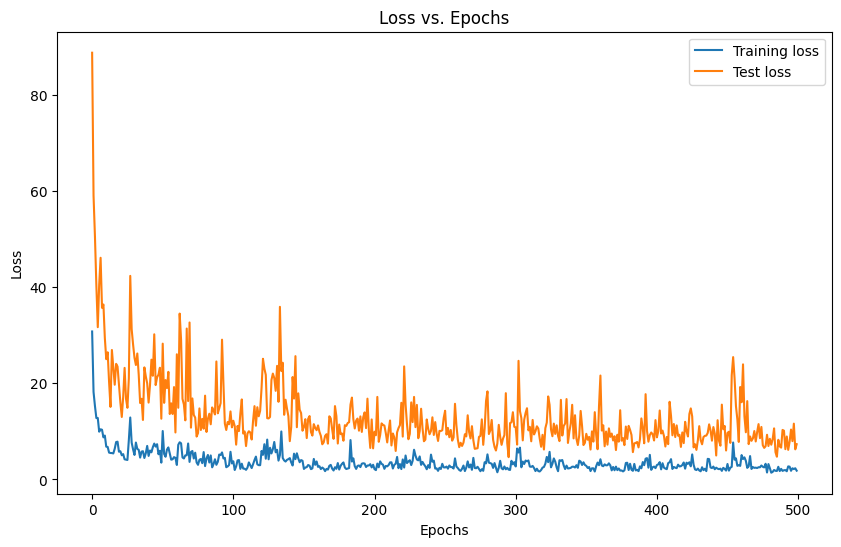

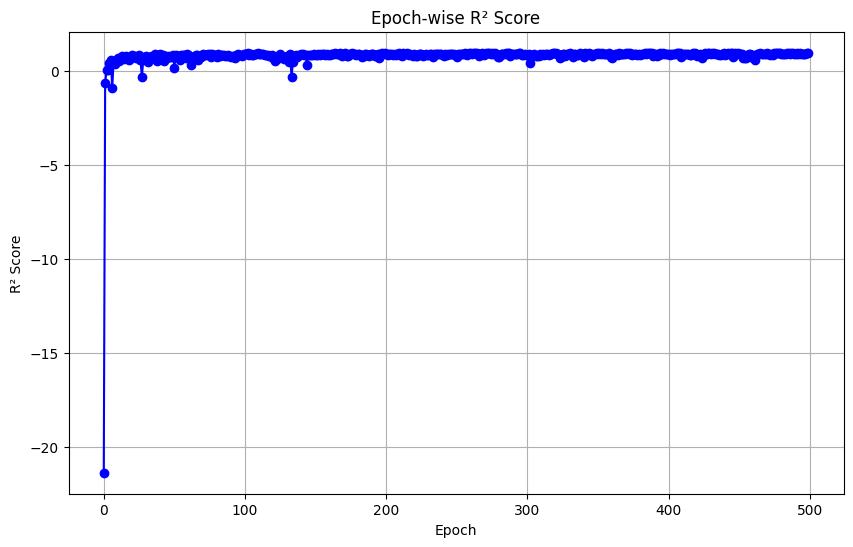

In [15]:
import os 
import pandas as pd 
import numpy as np 
import torch 
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

#在处理类别数据时，相关数据在dataset中处理，包括对数据分割为数值列，和类别列，并分别返回
class HgDataset(Dataset):
    def __init__(self,file_path,tranform=None,traget_tranform=None):
        """_summary_

        Args:
            file_path (_type_): _description_
            tranform (_type_, optional): _description_. Defaults to None.
            traget_tranform (_type_, optional): _description_. Defaults to None.
        """
        self.data=pd.read_csv(file_path)
        self.y=self.data['Hg_conc'].to_numpy().reshape(-1,1)# 设置因变量
        self.x=self.data.drop('Hg_conc',axis=1,inplace=False) 
        #数值数据与分类数据的划分
        self.numerical_x=self.x.drop('Background_pollu',axis=1,inplace=False).to_numpy()
        self.category_x=self.x['Background_pollu'].to_numpy()

        if tranform:
            self.x=tranform(self.x)
        if traget_tranform:
            self.y=traget_tranform(self.y)
    
    def __len__(self):
        return len(self.data)
    
    def getLabels(self):#返回分类数据分类标签的数量
        unique_labels = np.unique(self.category_x)
        num_labels = len(unique_labels)
        return unique_labels,num_labels
    
    def getNumerAttribut(self):
        return int(self.numerical_x.shape[1])

    def __getitem__(self,index):
        '''torch.is_tensor(idx): 这个函数检查idx是否是一个PyTorch张量（torch.Tensor）。在某些情况下，
        尤其是在使用高级索引或者批处理时，索引可能会以张量的形式给出。这个检查是为了确定是否需要将张量索引转换成Python列表，以便后续处理。

         idx.tolist(): 如果idx确实是一个张量，tolist()方法将这个张量转换成一个Python列表。这是必要的，
         因为在接下来的数据检索过程中，通常需要索引作为整数或者整数列表来使用，而不是张量。'''
        if torch.is_tensor(index):
            index = index.tolist()

        y_i=self.y[index]
        nx_i=self.numerical_x[index]
        cx_i=self.category_x[index]
        return nx_i,cx_i,y_i
    

def my_transform(batch,device):
    nx,cx,y=zip(*batch)
    #print(type(x))
    nx=np.array(nx)
    cx=np.array(cx)
    y=np.array(y)

    scaler=StandardScaler()
    nx=scaler.fit_transform(nx)
    nx=torch.tensor(nx,dtype=torch.float32).to(device)
    cx=torch.tensor(cx,dtype=torch.long).to(device)#category数据类型应该是int
    y=torch.tensor(y,dtype=torch.float32).to(device)
    return nx,cx,y
################################################################
class Mymodel(nn.Module):
    def __init__(self,numercial_at,category_label,embed_dim,drop_p):
        super(Mymodel, self).__init__()
       
        self.embedd=nn.Embedding(num_embeddings=category_label,embedding_dim=embed_dim)
        self.l1=nn.Linear(numercial_at,100)
        self.l2=nn.Linear(embed_dim+100,50)
        self.b1=nn.BatchNorm1d(50)
        self.d1=nn.Dropout(p=drop_p)
        self.r1=nn.ReLU()
        self.l3=nn.Linear(50,1)
             
    '''
    torch.flatten(x_categorical, start_dim=1): 将嵌入向量展平。
    start_dim=1意味着保留批次维度（假设批次维度是第0维），
    将嵌入向量的所有维度（从第1维开始）展平为一维。
    这一步骤是为了将每个样本的所有嵌入向量合并成一个单一的向量，以便与数值数据拼接。

    torch.cat([x_numeric, x_categorical], dim=1):
      将处理过的数值数据和展平后的类别数据嵌入向量沿着特征维度（dim=1）进行拼接。
      这样，模型就可以同时考虑类别特征和数值特征。
    '''
    def forward(self,numercial_input,category_input):
        cx=self.embedd(category_input)
        nx=self.l1(numercial_input)

        #cx=torch.flatten(cx,start_dim=1)
        x=torch.cat([nx,cx],dim=1)# 注意保持数值和类别数据的顺序一致
        x=self.l2(x)
        x=self.b1(x)
        x=self.d1(x)
        x=self.r1(x)
        x=self.l3(x)
        return x

         
if __name__ == "__main__":
    filename='data/Hg_notime_nocooked.csv'
    # 得到categories 的labes数，以及numerical 
    hdataset=HgDataset(filename)
    
    unique_labels,categories_num=hdataset.getLabels()
    print(unique_labels)
    numerical_dim=hdataset.getNumerAttribut()
    print("the labels of category attribute is {} and the numerical attribute dim is {}".format(categories_num,numerical_dim,))
    
    #######################分割tran，test############
    dataset_len=len(hdataset)
    print('the lenght of dataset',dataset_len)
    train_size=int(0.8*dataset_len)
    test_size=dataset_len-train_size
    print("the length of train size is {},  test size is {}".format(train_size,test_size))
    train_dataset, test_dataset = random_split(hdataset, [train_size, test_size])
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    batch=20
    train_dataloader=DataLoader(train_dataset,batch_size=batch,shuffle=True,collate_fn=lambda x:my_transform(x,device))
    test_dataloader=DataLoader(test_dataset,batch_size=batch,shuffle=True,collate_fn=lambda x:my_transform(x,device))
   
    ################################超参等设置###################################
    lr=0.02
    category_dim=5
    drop_p=0.3
    epochs=500

    #############################实例化模型，以及优化模型，损失函数######################################
    model=Mymodel(numercial_at=numerical_dim,category_label= categories_num+1,embed_dim=5,drop_p=drop_p)
    model.to(device)
    loss_fn=nn.MSELoss()
    opt=torch.optim.Adam(params=model.parameters(),lr=lr) 
    #########################实现循环梯度下降################################################################
    train_losses = []
    test_losses = []
    epoch_r2_scores = []
    for i in range(epochs):
        train_loss=0
        for nx_batch,cx_batch,y_batch in test_dataloader:
            yp_batch=model.forward(nx_batch,cx_batch)
            loss=loss_fn(yp_batch,y_batch)
            opt.zero_grad()
            loss.backward()
            opt.step()
                # 用于记录训练和测试损失的列表
            train_loss += loss.item() * nx_batch.size(0)
        train_loss /= len(train_dataloader.dataset)
        train_losses.append(train_loss)
        
        model.eval()#进入评估模式，停止dropout和bathnorm
        test_loss=0
        y_true=[]
        y_pred_list=[]
        with torch.no_grad():
            for nx_batch,cx_batch,y_batch in test_dataloader:
                yp_batch=model.forward(nx_batch,cx_batch)
                loss=loss_fn(yp_batch,y_batch)
                test_loss += loss.item() * nx_batch.size(0)
                y_true.append(y_batch.cpu().numpy())  # 收集真实值
                y_pred_list.append(yp_batch.cpu().numpy())  # 收集预测值，注意此处应使用yp_batch

                # 由于对应的是回归方程，故计算r
        test_loss /= len(test_dataloader.dataset)
        test_losses.append(test_loss)

        y_pred_list=np.concatenate(y_pred_list,axis=0)
        y_true=np.concatenate(y_true,axis=0)
        r2=r2_score(y_pred_list,y_true)
        epoch_r2_scores.append(r2)
        print(f'R^2 Score: {r2}')
        # 打印每个epoch的损失
        print(f"Epoch {i+1}/{epochs}.. Train loss: {train_loss:.4f}.. Test loss: {test_loss:.4f}")
        # 绘制训练和测试损失
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training loss')
    plt.plot(test_losses, label='Test loss')
    plt.title('Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # 绘制批次R²分数曲线
# 所有epoch完成后，绘制epoch R²分数曲线
    plt.figure(figsize=(10, 6))
    plt.plot(epoch_r2_scores, marker='o', linestyle='-', color='blue')
    plt.title('Epoch-wise R² Score')
    plt.xlabel('Epoch')
    plt.ylabel('R² Score')
    plt.grid(True)
    plt.show()


## K-Fold 交叉验证

[深度概念]·K-Fold 交叉验证 (Cross-Validation)的理解与应用](https://zhuanlan.zhihu.com/p/67986077)
[pytorch 结合k-fold](https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-pytorch.md)

### 概念
在机器学习建模过程中，通行的做法通常是将数据分为训练集和测试集。测试集是与训练独立的数据，完全不参与训练，用于最终模型的评估。在训练过程中，经常会出现过拟合的问题，就是模型可以很好的匹配训练数据，却不能很好在预测训练集外的数据。如果此时就使用测试数据来调整模型参数，就相当于在训练时已知部分测试数据的信息，会影响最终评估结果的准确性。通常的做法是在训练数据再中分出一部分做为验证(Validation)数据，用来评估模型的训练效果。

验证数据取自训练数据，但不参与训练，这样可以相对客观的评估模型对于训练集之外数据的匹配程度。模型在验证数据中的评估常用的是交叉验证，又称循环验证。它将原始数据分成K组(K-Fold)，将每个子集数据分别做一次验证集，其余的K-1组子集数据作为训练集，这样会得到K个模型。这K个模型分别在验证集中评估结果，最后的误差MSE(Mean Squared Error)加和平均就得到交叉验证误差。交叉验证有效利用了有限的数据，并且评估结果能够尽可能接近模型在测试集上的表现，可以做为模型优化的指标使用。

下面举一个具体的例子来说明K-Fold的过程，比如如下的数据

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

分为K=3组后

Fold1: [0.5, 0.2] Fold2: [0.1, 0.3] Fold3: [0.4, 0.6]

交叉验证的时会使用如下三个模型，分别进行训练和测试，每个测试集误差MSE加和平均就得到了交叉验证的总评分

即使用$k-1$个数据子集进行训练，使用剩下的1个子集进行验证，并进行循环抽取


Model1: Trained on Fold1 + Fold2, Tested on Fold3

Model2: Trained on Fold2 + Fold3, Tested on Fold1

Model3: Trained on Fold1 + Fold3, Tested on Fold2

### 使用场景

k-flod一般使用在数据量不足的情况下进行使用，从而降低拟合度

我们为了防止在训练过程中，出现过拟合的问题，通行的做法通常是将数据分为训练集和测试集。测试集是与训练独立的数据，完全不参与训练，用于最终模型的评估。

这样的直接划分会导致一个问题就是测试集不会参与训练，这样在小的数据集上会浪费掉这部分数据，无法使模型达到最优（数据决定了程性能上限，模型与算法会逼近这个上限）。

但是我们又不能划分测试集，因为需要验证网络泛化性能。采用K-Fold 多次划分的形式就可以利用全部数据集。最后采用平均的方法合理表示模型性能。



### 实验2 图像分类（from numpy）

#### 实验2.1 numpy 图像分类转换
该实验对之前numpy版本的深度学习网络进行pytorch实现，其中数据载入、建议使用之前的方法，而非pytorch方法，在进阶实验中换为pytorch的
Dataloder()

----

实验中，出现训练集loss下降，但测试集loss不变的情况，不知道是否是因为过拟合问题，同修改模型尝试解决问题。

----
实验记录
1. pytroch 中 CrossEntropyLoss 交叉熵误差函数输入值不能是one-hot，因为其会自动在内部进行变换，故必须输入1，3，5等原始分类数据标签
2. 输入CrossEntropyLoss中CrossEntropyLoss(pred,y),y实际值必须为long数据类型，而不能为float，可以显示通过y.long()进行转换
3. CrossEntropyLoss 中已经集成了softmax，故不定义softmax层

In [41]:
!pip install torchsummary

1
current device: cuda


C:\Users\tom\AppData\Local\Temp\ipykernel_22916\696759573.py:91: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_numpy.cpp:212.)
  t_train=torch.from_numpy(t_train).to(torch.float32).to(device)


torch.Size([1000, 784]) torch.Size([1000])
torch.Size([10000, 784]) torch.Size([10000])
10
第0次epoch的train loss为：2.2043092250823975
第0次epoch的test loss为：2.060028076171875
################################
第10次epoch的train loss为：0.8260545134544373
第10次epoch的test loss为：0.45818135142326355
################################
第20次epoch的train loss为：0.4711284935474396
第20次epoch的test loss为：0.45096713304519653
################################
第30次epoch的train loss为：0.3263116776943207
第30次epoch的test loss为：0.47955191135406494
################################
第40次epoch的train loss为：0.24883389472961426
第40次epoch的test loss为：0.5057613849639893
################################
第50次epoch的train loss为：0.20087772607803345
第50次epoch的test loss为：0.5275853872299194
################################
第60次epoch的train loss为：0.1683601588010788
第60次epoch的test loss为：0.5460007190704346
################################
第70次epoch的train loss为：0.14488352835178375
第70次epoch的test loss为：0.5616571307182312
###########################

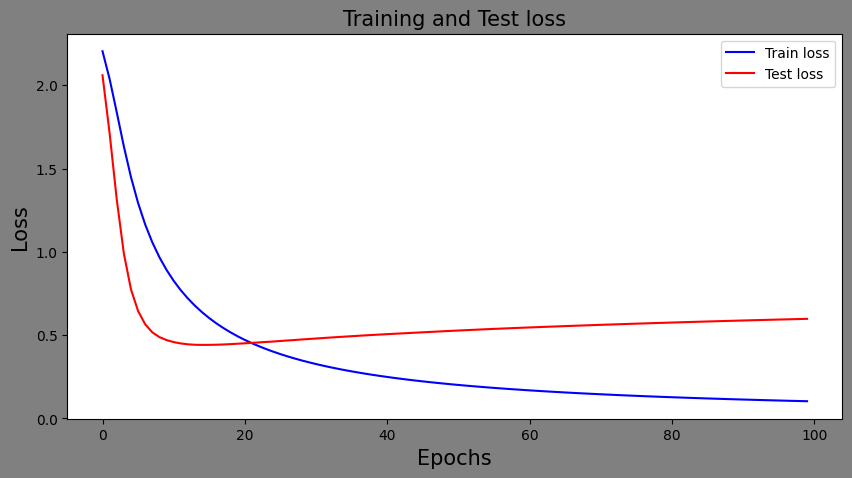

In [38]:
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import load_data as l
from matplotlib import pyplot as plt
import numpy as np 
from torchsummary import summary
import torch.nn.functional as F
import sys, os 
from PIL import Image
sys.path.append(os.pardir)
import pickle

def img_show(img):
    """显示图像函数

    Args:
        img (np.array): 载入的图像,数组格式
    """
    pil_img=Image.fromarray(np.uint(img))
    pil_img.show()
    
class MNet(nn.Module):
    def __init__(self,input,hidden,output) -> None:
        super(MNet,self).__init__()
        
        self.linear1=nn.Linear(in_features=input,out_features=hidden)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(in_features=hidden,out_features=hidden)
        self.relu2=nn.ReLU()
        self.linear3=nn.Linear(in_features=hidden,out_features=hidden)
        self.relu3=nn.ReLU()
        self.linear4=nn.Linear(in_features=hidden,out_features=output)
            
  
    def forward(self,x):
        x=self.linear1.forward(x)
        x=self.relu1.forward(x)
        x=self.linear2.forward(x)
        x=self.relu2.forward(x)
        x=self.linear3.forward(x)
        x=self.relu3.forward(x)
        x=self.linear4.forward(x)
        return x
    
    def accuracy(self, x, t):
        y = self.forward(x)
        y = torch.argmax(y, axis=1)
        #if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = torch.sum(y == t) / torch.FloatTensor(x.shape[0])
        return accuracy
    
class SimpleNet(nn.Module):
    def __init__(self,input,hidden,output) -> None:
        super(SimpleNet,self).__init__()
        self.l1=nn.Linear(input,hidden)
        self.l2=nn.Linear(hidden,hidden)
        self.l3=nn.Linear(hidden,output)
    def forward(self,x):
        x=F.relu(self.l1(x))
        x=F.relu(self.l2(x))
        x=self.l3(x)
        return x
    
if __name__ == '__main__':
    ################################数据载入、数据预处理################################
    #对所有数据进行 normalization
    stdsc=StandardScaler()
    (x_train,t_train),(x_test,t_test)=l.load_mnist(normalize=False ,one_hot_label=False,flatten=True)#flatten是否将矩阵变为一维数组
    
    
    x_train, t_train=x_train[:1000], t_train[:1000]
    #img_train=x_train[1]
    #img_show(img_train.reshape(28,28))#查看图象是否正确
    #print(t_train[1])
    img_test=x_test[5]
    img_show(img_test.reshape(28,28))#查看图象是否正确
    print(t_test[5])
    #通过standardScaler实现输入图像数据正则化处理
    x_train=stdsc.fit_transform(x_train)
    x_test=stdsc.fit_transform(x_test)
    train_size=x_train.shape[0]# 获取行数
    
    step_loss=[]
    train_loss_list=[]
    test_loss_list=[]
    test_loss_list
    ################################numpy数据张量化，并载入本机gpu或cpu################################`
    device="cuda" if torch.cuda.is_available() else "cpu"
    print("current device: " + device)
    x_train=torch.from_numpy(x_train).to(torch.float32).to(device)
    t_train=torch.from_numpy(t_train).to(torch.float32).to(device)
    x_test=torch.from_numpy(x_test).to(torch.float32).to(device)
    t_test=torch.from_numpy(t_test).to(torch.float32).to(device)
    #t_train=t_train.view(-1,1)
    #t_test=t_test.view(-1,1)
    print(x_train.shape,t_train.shape)
    print(x_test.shape,t_test.shape)
    ## 超参设定
    learning_rate=0.001#学习率
    batch_size=100# 每批次随机选取100张图像
    epochs=100#循环epoch次数
    steps=int(x_train.shape[0]//batch_size)#完成一个epoch需要读取多少次batch
    print(steps)
    ################################网络实例构建################################
    #构建网络实例，注意在网络实例化时，权参、偏参也赋予了初始值
    print("the input shape of the training data is: ",x_train.shape[1])
    net=SimpleNet(input=int(x_train.shape[1]),hidden=40,output=10)

    net.to(device)
    loss_fn=nn.CrossEntropyLoss()
    opt=torch.optim.Adam(params=net.parameters(),lr=learning_rate)
    #summary(net,input_size=(784,))
    ################################网络实例训练################################
    for epoch in range(epochs):
        #print("第{}次epoch".format(epoch))
        for step in range(steps):
            x=x_train[step*batch_size:(step+1)*batch_size,:]
            y=t_train[step*batch_size:(step+1)*batch_size]
            
            y_pred=net(x)
            
            
            #print(y.long())
            loss=loss_fn(y_pred,y.long())
            step_loss.append(loss.cpu().detach().numpy())
            opt.zero_grad()
            loss.backward()
            opt.step()
        train_loss=np.mean(step_loss)
        y_predict=net.forward(x_test)
        test_loss=loss_fn(y_predict,t_test.long())
        test_loss_list.append(test_loss.cpu().detach().numpy())
        train_loss_list.append( np.mean(step_loss))
        
        
        if epoch%10==0:
            print("第{}次epoch的train loss为：{}".format(epoch,train_loss))
            print("第{}次epoch的test loss为：{}".format( epoch,test_loss))
            print("################################")
        
    print("训练结束")
    ###############################################loss graph#################################################
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    fig.set_facecolor("gray")
    plt.xlabel('Epochs', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.plot(train_loss_list, 'blue', label='Train loss')
    plt.plot(test_loss_list, 'red', label='Test loss')
    plt.legend(loc='best')
    plt.title('Training and Test loss', fontsize=15)
    plt.show()   
 

#### 实验2.2 基于 dataset dataloader 图像分类

数据来源于torchvision.datasets，已经经过预处理可以直接通过dataloader调用

---
##### 关于图片在python中的基本处理
* [深度学习NCHW和NHWC数据格式（由三维数据转换成一维数据的遍历方式）](https://dontla.blog.csdn.net/article/details/123141775?spm=1001.2101.3001.6650.1&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-123141775-blog-108960632.pc_relevant_recovery_v2&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-123141775-blog-108960632.pc_relevant_recovery_v2&utm_relevant_index=2)
* [https://blog.csdn.net/m0_37673307/article/details/81271155](https://blog.csdn.net/m0_37673307/article/details/81271155)
不同于灰度图片，读取的图片的格式加入了通道维度，

---

实验笔记：

1. 在计算loss与accuracy时，应该停止梯度计算，主要是为了节约计算资源，防止内存爆炸。
2. 同样在读取loss，accracy值时，或者通过.cup().detch().numpy() 将数据转移到cpu，并脱离梯度计算detch，然后变为numpy；

使用loss += loss.detach()来获取不需要梯度回传的部分。或者使用loss.item()直接获得所对应的python数据类型。
> 简单理解就是.item()直接返回tensor的值，而不是对象

3. 由于数据量较大，可以使用from torch.utils.data import Subset，中Subset，保留索引对应的值，缩小数据量
[dataset 划分参考](https://lewtun.github.io/blog/til/nlp/pytorch/2021/01/24/til-slicing-torch-datasets.html)

In [39]:
!pip install OpenCV

ERROR: Could not find a version that satisfies the requirement OpenCV (from versions: none)
ERROR: No matching distribution found for OpenCV


In [40]:
import torchvision
from torchvision.transforms import ToTensor
from torch.utils.data import Subset
train_ds=torchvision.datasets.MNIST('data/',train=True,transform=ToTensor(),download=True)
test_ds=torchvision.datasets.MNIST('data/',train=False,transform=ToTensor(),download=True)

 
import numpy as np


num_train_examples = 500
sample_ds = Subset(train_ds, np.arange(num_train_examples))
assert len(sample_ds) == num_train_examples
print(len(sample_ds))
train_data=enumerate(train_ds)
for  bitch_idx,(x_train,y_train) in train_data:
     print("批次",bitch_idx)
     print("########################")
     print("一个批次对应数据量： ",x_train.shape)
     print("因变量：",y_train)
     break
x_train=torch.utils.data.DataLoader(train_ds,batch_size=20,shuffle=True)#可以通过dataloader显示指定每个batch_size,以及是否shuffle，前提是输入的数据必须是dataset
for x,y in x_train:
     print(x.shape)
     print(y)
     break

500
批次 0
########################
一个批次对应数据量：  torch.Size([1, 28, 28])
因变量： 5
torch.Size([20, 1, 28, 28])
tensor([3, 2, 3, 7, 3, 6, 9, 5, 3, 7, 0, 2, 5, 6, 9, 1, 0, 7, 8, 8])


current device: cuda
一个train epoch中数据长度 500
一个test epoch中数据长度 500
the batch 1
the batch 2
the batch 3
the batch 4
the batch 5
the batch 6
the batch 7
the batch 8
the batch 9
the batch 10
the batch 11
the batch 12
the batch 13
the batch 14
the batch 15
the batch 16
the batch 17
the batch 18
the batch 19
the batch 20
the batch 21
the batch 22
the batch 23
the batch 24
the batch 25
##############第0次epoch#################
train loss为：2.0000054836273193
test loss为：1.7443774938583374
train accuracy为：44.2%
test accuracy为：54.6%
the batch 1
the batch 2
the batch 3
the batch 4
the batch 5
the batch 6
the batch 7
the batch 8
the batch 9
the batch 10
the batch 11
the batch 12
the batch 13
the batch 14
the batch 15
the batch 16
the batch 17
the batch 18
the batch 19
the batch 20
the batch 21
the batch 22
the batch 23
the batch 24
the batch 25
the batch 1
the batch 2
the batch 3
the batch 4
the batch 5
the batch 6
the batch 7
the batch 8
the batch 9
the batch 10
the batch 11
the batch 12
the batch 1

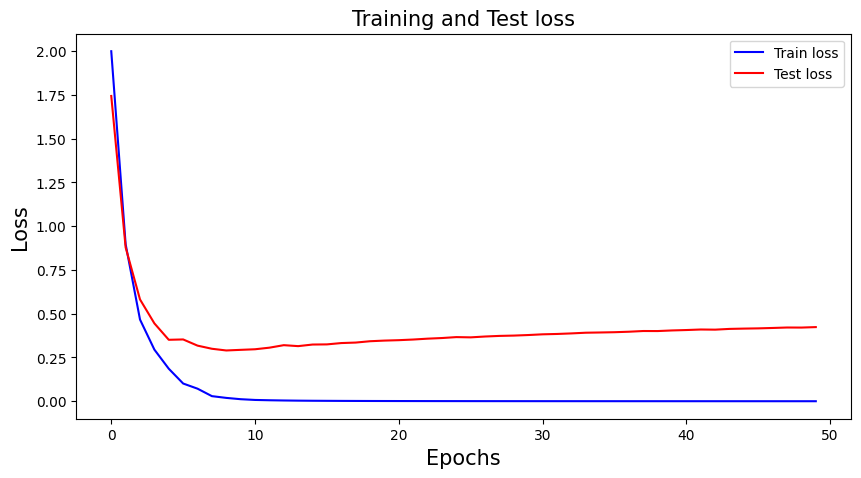

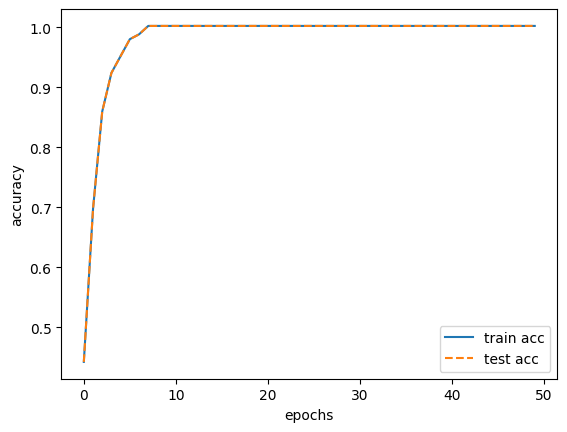

In [44]:
import torch
import torch.nn as nn
import myfucntion.Function as f
from importlib import reload
from sklearn.preprocessing import StandardScaler
#import load_data as l
from matplotlib import pyplot as plt
import numpy as np 
from torchsummary import summary
import torch.nn.functional as F
import torchvision
from torchvision.transforms import ToTensor
reload(f)
 
class MNet(nn.Module):
    def __init__(self,input,hidden,output) -> None:
        super(MNet,self).__init__()
        
        self.linear1=nn.Linear(in_features=input,out_features=hidden)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(in_features=hidden,out_features=hidden)
        self.relu2=nn.ReLU()
        self.linear3=nn.Linear(in_features=hidden,out_features=hidden)
        self.relu3=nn.ReLU()
        self.linear4=nn.Linear(in_features=hidden,out_features=output)
            
  
    def forward(self,x):
        x=x.view(-1,28*28)#将输入图像变为28*28分辨率
        x=self.linear1(x)
        x=self.relu1(x)
        x=self.linear2(x)
        x=self.relu2(x)
        x=self.linear3(x)
        x=self.relu3(x)
        x=self.linear4(x)
        return x
    


if __name__ == '__main__':
    ################################数据载入、数据预处理################################
    train_ds=torchvision.datasets.MNIST('data/',train=True,transform=ToTensor(),download=False)
    test_ds=torchvision.datasets.MNIST('data/',train=False,transform=ToTensor(),download=False)
    # 缩减数据量
    num_train_examples = 500
    num_test_examples  = 300
    train_ds = Subset(train_ds, np.arange(num_train_examples))
    test_ds = Subset(test_ds, np.arange(num_train_examples))
    # 通过dataloader进行处理
    train_data=torch.utils.data.DataLoader(train_ds,batch_size=20,shuffle=True)
    test_data=torch.utils.data.DataLoader(test_ds,batch_size=20,shuffle=False)
   

    train_loss_list=[]
    test_loss_list=[]
    train_correct_list=[]
    test_correct_list=[]
    ################################numpy数据张量化，并载入本机gpu或cpu################################`
    device="cuda" if torch.cuda.is_available() else "cpu"
    print("current device: " + device)
 
 
    ## 超参设定
    learning_rate=0.001#学习率
    batch_size=20# 每批次随机选取20张图像
    epochs=50#循环epoch次数
 
    ################################网络实例构建################################
    #构建网络实例，注意在网络实例化时，权参、偏参也赋予了初始值
    net=MNet(input=28*28,hidden=200,output=10)
    net.to(device)
    loss_fn=nn.CrossEntropyLoss()
    opt=torch.optim.Adam(params=net.parameters(),lr=learning_rate)
    #summary(net,input_size=(784,))
    ################################网络实例训练################################
    train_len=len(train_data.dataset)
    print("一个train epoch中数据长度",train_len)
    test_len=len(test_data.dataset)
    print("一个test epoch中数据长度",test_len)
    train_correct=0
    test_correct=0
    for epoch in range(epochs):
        #print("第{}次epoch".format(epoch))
        step_loss=[]
        step_correct=[]
        batch=0
        for x,y in train_data:#trian_data每次载入一个batch_size(20),一个epcoch包含500个图片，故需要23次循环
            x,y=x.to(device),y.to(device)
            pred=net(x)
            loss=loss_fn(pred,y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            step_loss.append(loss.cpu().detach().numpy())
            #step_correct.append((pred.argmax(dim=1)==y).type(torch.float).sum().item())
            train_correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
            #step_correct=(pred.argmax(1)==y).type(torch.float).sum().item()
            #print(step_correct/20,"%")
            batch=batch+1
            print("the batch",batch)
        train_loss=np.mean(step_loss)
        train_loss_list.append( train_loss)
        #train_correct=np.sum(step_correct)/train_len
        train_correct/=train_len
        train_correct_list.append( train_correct)
        
        
        with torch.no_grad():# since we're not training, we don't need to calculate the gradients for our outputs
            for x,y in test_data:
                x,y=x.to(device),y.to(device)
                pred=net(x)
                loss=loss_fn(pred,y)
                step_loss.append(loss.cpu().detach().numpy())
                test_correct+=(pred.argmax(dim=1)==y).type(torch.float).sum().item()
                
        test_loss=np.mean(step_loss)
        test_loss_list.append(test_loss)
        #test_correct=np.sum(step_correct)/test_len
        test_correct/=test_len
        test_correct_list.append( train_correct)
        
        
        
        if epoch%10==0 :
            print("##############第{}次epoch#################".format(epoch))
            print("train loss为：{}".format(train_loss))
            print("test loss为：{}".format( test_loss))
            print("train accuracy为：{}%".format(train_correct*100))
            print("test accuracy为：{}%".format( test_correct*100))
        if epoch==epochs-1:
            print("***********************fin! good luck!*******************************")
            print("The final train loss：{}".format(train_loss))
            print("The final train  loss为：{}".format( test_loss))
            print("The final train accuracy：{}%".format( train_correct*100))
            print("The final test accuracy：{}%".format( test_correct*100))
    f.loss_fig(train_loss_list,test_loss_list)
    f.accuracy_fig(train_correct_list,test_correct_list)
    

In [11]:
print(epochs)

50


### 实验2.3 优化实验2.2 

实验目标：

* 引入weight decay，dropot 降低自拟合
* 使用batch normalization
* 优化学习率，学习率衰减

---
1. batch normalization

* [PyTorch——Batch Normalization（批量归一化）](https://blog.csdn.net/beilizhang/article/details/115416708)

* [Batch Normalization and Dropout in Neural Networks with Pytorch](https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd)

[参考](https://towardsdatascience.com/weight-decay-and-its-peculiar-effects-66e0aee3e7b8)

pytorch中，batch normalization也是对应加入一层，不同于dropout等层的是，对应不同维度数据（例如3维度彩色图片），Pytorch中nn模块定义的BatchNorm1d和BatchNorm2d类分别用于全连接层和卷积层，都需要指定输入的num_features参数值。
 
* nn.BatchNorm1d——矩阵张量 Liner(intout,output)->nn.BatchNorm1d(output)->Relu()
* nn.BatchNorm2d——3d张量（图片）


----

实验结果：

> 未优化前loss accuracy：

The final train loss：0.00016342761227861047

The final train  loss：0.4075630307197571

The final train accuracy：100.2004008016032%

The final test accuracy：84.3683366733467%


---

实验结果
1. 加入dropout层
* (p=0.5)
***********************fin! good luck!*******************************
The final train loss：0.039016470313072205
The final train  loss为：0.5459088683128357
The final train accuracy：99.19759359998717%
The final test accuracy：81.16793663974346%
>loss，accuracy反而没有改善，过拟合有所减低

* p=0.2 效果很好，过拟合有所减轻，同时精度上升

The final train loss：0.004101796541363001
The final train  loss为：0.4097197651863098
The final train accuracy：100.1999951887904%
The final test accuracy：84.56713263810506%

>结论，加入dropout，过拟合现象有所改善，但模型拟合度降低

2. 加入L2正则化，实现weight decay

* weight_decay=0.001
> 一般而言，weigt_decay由pytorch自动设置，不需要调整
The final train loss：0.05548945069313049
The final train  loss为：0.32841596007347107
The final train accuracy：100.19919919837757%
The final test accuracy：83.56632626369861%
The final test accuracy：81.36192625570175%
>结论，加入weight decay，过拟合现象进一步所改善，但模型拟合度进一步降低

3. 加入batch normalization：

> 提升效果一般

The final train loss：0.012145309709012508
The final train  loss为：0.39998507499694824
The final train accuracy：99.79920000160321%
The final test accuracy：81.7651278781563%

current device: cuda
一个train epoch中数据长度 500
一个test epoch中数据长度 500
##############第0次epoch#################
train loss为：1.253820538520813
test loss为：1.0714396238327026
train accuracy为：65.8%
test accuracy为：75.0%
##############第10次epoch#################
train loss为：0.05604599788784981
test loss为：0.3044620752334595
train accuracy为：98.99959999999356%
test accuracy为：82.9643230765371%
##############第20次epoch#################
train loss为：0.012977584265172482
test loss为：0.30195870995521545
train accuracy为：99.7999991984032%
test accuracy为：83.16552865573385%
##############第30次epoch#################
train loss为：0.01004707533866167
test loss为：0.34659507870674133
train accuracy为：99.99879356794233%
test accuracy为：84.36392223009538%
##############第40次epoch#################
train loss为：0.003951424732804298
test loss为：0.34388241171836853
train accuracy为：100.2004000016032%
test accuracy为：84.36713507012108%
***********************fin! good luck!*******************************
The final train loss：0.0079909

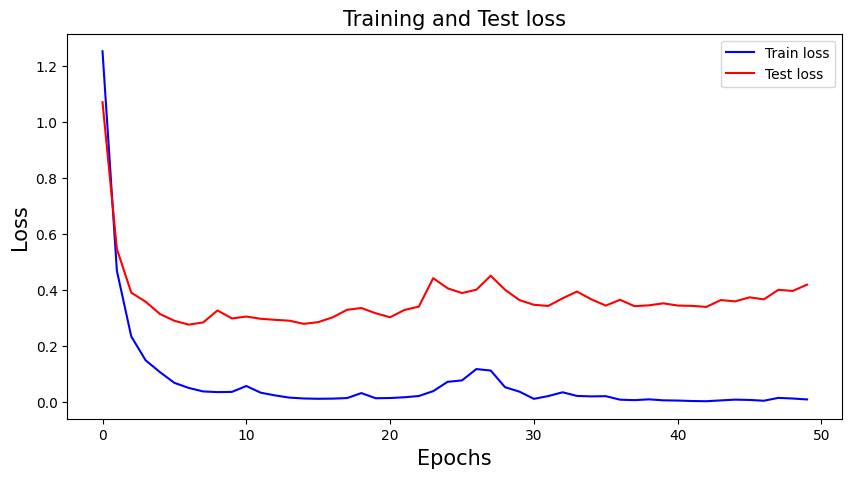

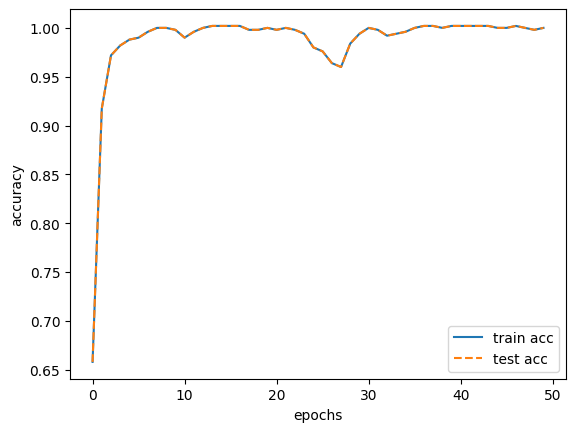

In [1]:
import torch
import torch.nn as nn
import myfucntion.Function as f
from importlib import reload
from sklearn.preprocessing import StandardScaler
#import load_data as l
from matplotlib import pyplot as plt
import numpy as np 
from torchsummary import summary
from torch.utils.data import Subset
import torch.nn.functional as F
import torchvision
from torchvision.transforms import ToTensor
reload(f)
 
class MNet1(nn.Module):
    def __init__(self,input,hidden,output) -> None:
        super(MNet1,self).__init__()
        
        self.linear1=nn.Linear(in_features=input,out_features=hidden)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(in_features=hidden,out_features=hidden)
        self.relu2=nn.ReLU()
        self.linear3=nn.Linear(in_features=hidden,out_features=hidden)
        self.relu3=nn.ReLU()
        self.linear4=nn.Linear(in_features=hidden,out_features=output)
            
  
    def forward(self,x):
        x=x.view(-1,28*28)
        x=self.linear1(x)
        x=self.relu1(x)
        x=self.linear2(x)
        x=self.relu2(x)
        x=self.linear3(x)
        x=self.relu3(x)
        x=self.linear4(x)
        return x
    
class MNet2(nn.Module):
    """加入drop out层

    Args:
        nn (_type_): _description_
    """
    def __init__(self,input,hidden,output,drop_p=0.5) -> None:
        """_summary_

        Args:
            input (_type_): _description_
            hidden (_type_): _description_
            output (_type_): _description_
            drop_p (float, optional): dropout层中屏蔽神经网络节点的概率. Defaults to 0.5.
        """
        super(MNet2,self).__init__()
        
        self.linear1=nn.Linear(in_features=input,out_features=hidden)
        self.d1=nn.Dropout(p=drop_p)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(in_features=hidden,out_features=hidden)
        self.d2=nn.Dropout(p=drop_p)
        self.relu2=nn.ReLU()
        self.linear3=nn.Linear(in_features=hidden,out_features=hidden)
        self.d3=nn.Dropout(p=drop_p)
        self.relu3=nn.ReLU()
        self.linear4=nn.Linear(in_features=hidden,out_features=output)
            
  
    def forward(self,x):
        x=x.view(-1,28*28)
        x=self.linear1(x)
        x=self.d1(x)
        x=self.relu1(x)
        x=self.linear2(x)
        x=self.d2(x)
        x=self.relu2(x)
        x=self.linear3(x)
        x=self.d3(x)
        x=self.relu3(x)
        x=self.linear4(x)
        return x
class MNet3(nn.Module):
    """加入Batch normilization层

    Args:
        nn (_type_): _description_
    """
    def __init__(self,input,hidden,output) -> None:
        """_summary_

        Args:
            input (_type_): _description_
            hidden (_type_): _description_
            output (_type_): _description_
             
        """
        super(MNet3,self).__init__()
        
        self.linear1=nn.Linear(in_features=input,out_features=hidden)
        self.n1=nn.BatchNorm1d(hidden)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(in_features=hidden,out_features=hidden)
        self.n2=nn.BatchNorm1d(hidden)
        self.relu2=nn.ReLU()
        self.linear3=nn.Linear(in_features=hidden,out_features=hidden)
        self.n3=nn.BatchNorm1d(hidden)
        self.relu3=nn.ReLU()
        self.linear4=nn.Linear(in_features=hidden,out_features=output)
            
  
    def forward(self,x):
        x=x.view(-1,28*28)
        x=self.linear1(x)
        x=self.n1(x)
        x=self.relu1(x)
        x=self.linear2(x)
        x=self.n2(x)
        x=self.relu2(x)
        x=self.linear3(x)
        x=self.n3(x)
        x=self.relu3(x)
        x=self.linear4(x)
        return x
if __name__ == '__main__':
    ################################数据载入、数据预处理################################
    train_ds=torchvision.datasets.MNIST('data/',train=True,transform=ToTensor(),download=False)
    test_ds=torchvision.datasets.MNIST('data/',train=False,transform=ToTensor(),download=False)
    # 缩减数据量
    num_train_examples = 500
    num_test_examples  = 300
    train_ds = Subset(train_ds, np.arange(num_train_examples))
    test_ds = Subset(test_ds, np.arange(num_train_examples))
    # 通过dataloader进行处理
    train_data=torch.utils.data.DataLoader(train_ds,batch_size=20,shuffle=True)
    test_data=torch.utils.data.DataLoader(test_ds,batch_size=20,shuffle=False)
   

    train_loss_list=[]
    test_loss_list=[]
    train_correct_list=[]
    test_correct_list=[]
    ################################numpy数据张量化，并载入本机gpu或cpu################################`
    device="cuda" if torch.cuda.is_available() else "cpu"
    print("current device: " + device)
 
 
    ## 超参设定
    learning_rate=0.001#学习率
    batch_size=20# 每批次随机选取100张图像
    epochs=50#循环epoch次数
    drop_p=0.2
    weight_decay=0.01
    ################################网络实例构建################################
    #构建网络实例，注意在网络实例化时，权参、偏参也赋予了初始值
    #net=MNet2(input=28*28,hidden=200,output=10,drop_p=drop_p)
    #net=MNet3(input=28*28,hidden=200,output=10)
    net=MNet3(input=28*28,hidden=200,output=10)
    net.to(device)
    loss_fn=nn.CrossEntropyLoss()
    opt=torch.optim.Adam(params=net.parameters(),lr=learning_rate)
    #summary(net,input_size=(784,))
    ################################网络实例训练################################
    train_len=len(train_data.dataset)
    print("一个train epoch中数据长度",train_len)
    test_len=len(test_data.dataset)
    print("一个test epoch中数据长度",test_len)
    train_correct=0
    test_correct=0
    for epoch in range(epochs):
        #print("第{}次epoch".format(epoch))
        step_loss=[]
        step_correct=[]
        for x,y in train_data:
            x,y=x.to(device),y.to(device)
            pred=net(x)
            loss=loss_fn(pred,y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            step_loss.append(loss.cpu().detach().numpy())
            #step_correct.append((pred.argmax(dim=1)==y).type(torch.float).sum().item())
            train_correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
            #step_correct=(pred.argmax(1)==y).type(torch.float).sum().item()
            #print(step_correct/20,"%")
        train_loss=np.mean(step_loss)
        train_loss_list.append( train_loss)
        #train_correct=np.sum(step_correct)/train_len
        train_correct/=train_len
        train_correct_list.append( train_correct)
        
        
        with torch.no_grad():# since we're not training, we don't need to calculate the gradients for our outputs
            for x,y in test_data:
                x,y=x.to(device),y.to(device)
                pred=net(x)
                loss=loss_fn(pred,y)
                step_loss.append(loss.cpu().detach().numpy())
                test_correct+=(pred.argmax(dim=1)==y).type(torch.float).sum().item()
                
        test_loss=np.mean(step_loss)
        test_loss_list.append(test_loss)
        #test_correct=np.sum(step_correct)/test_len
        test_correct/=test_len
        test_correct_list.append( train_correct)
        
        
        
        if epoch%10==0 :
            print("##############第{}次epoch#################".format(epoch))
            print("train loss为：{}".format(train_loss))
            print("test loss为：{}".format( test_loss))
            print("train accuracy为：{}%".format(train_correct*100))
            print("test accuracy为：{}%".format( test_correct*100))
        if epoch==epochs-1:
            print("***********************fin! good luck!*******************************")
            print("The final train loss：{}".format(train_loss))
            print("The final train  loss为：{}".format( test_loss))
            print("The final train accuracy：{}%".format( train_correct*100))
            print("The final test accuracy：{}%".format( test_correct*100))
    f.loss_fig(train_loss_list,test_loss_list)
    f.accuracy_fig(train_correct_list,test_correct_list)